# **Customer Churn Analysis and Prediction**

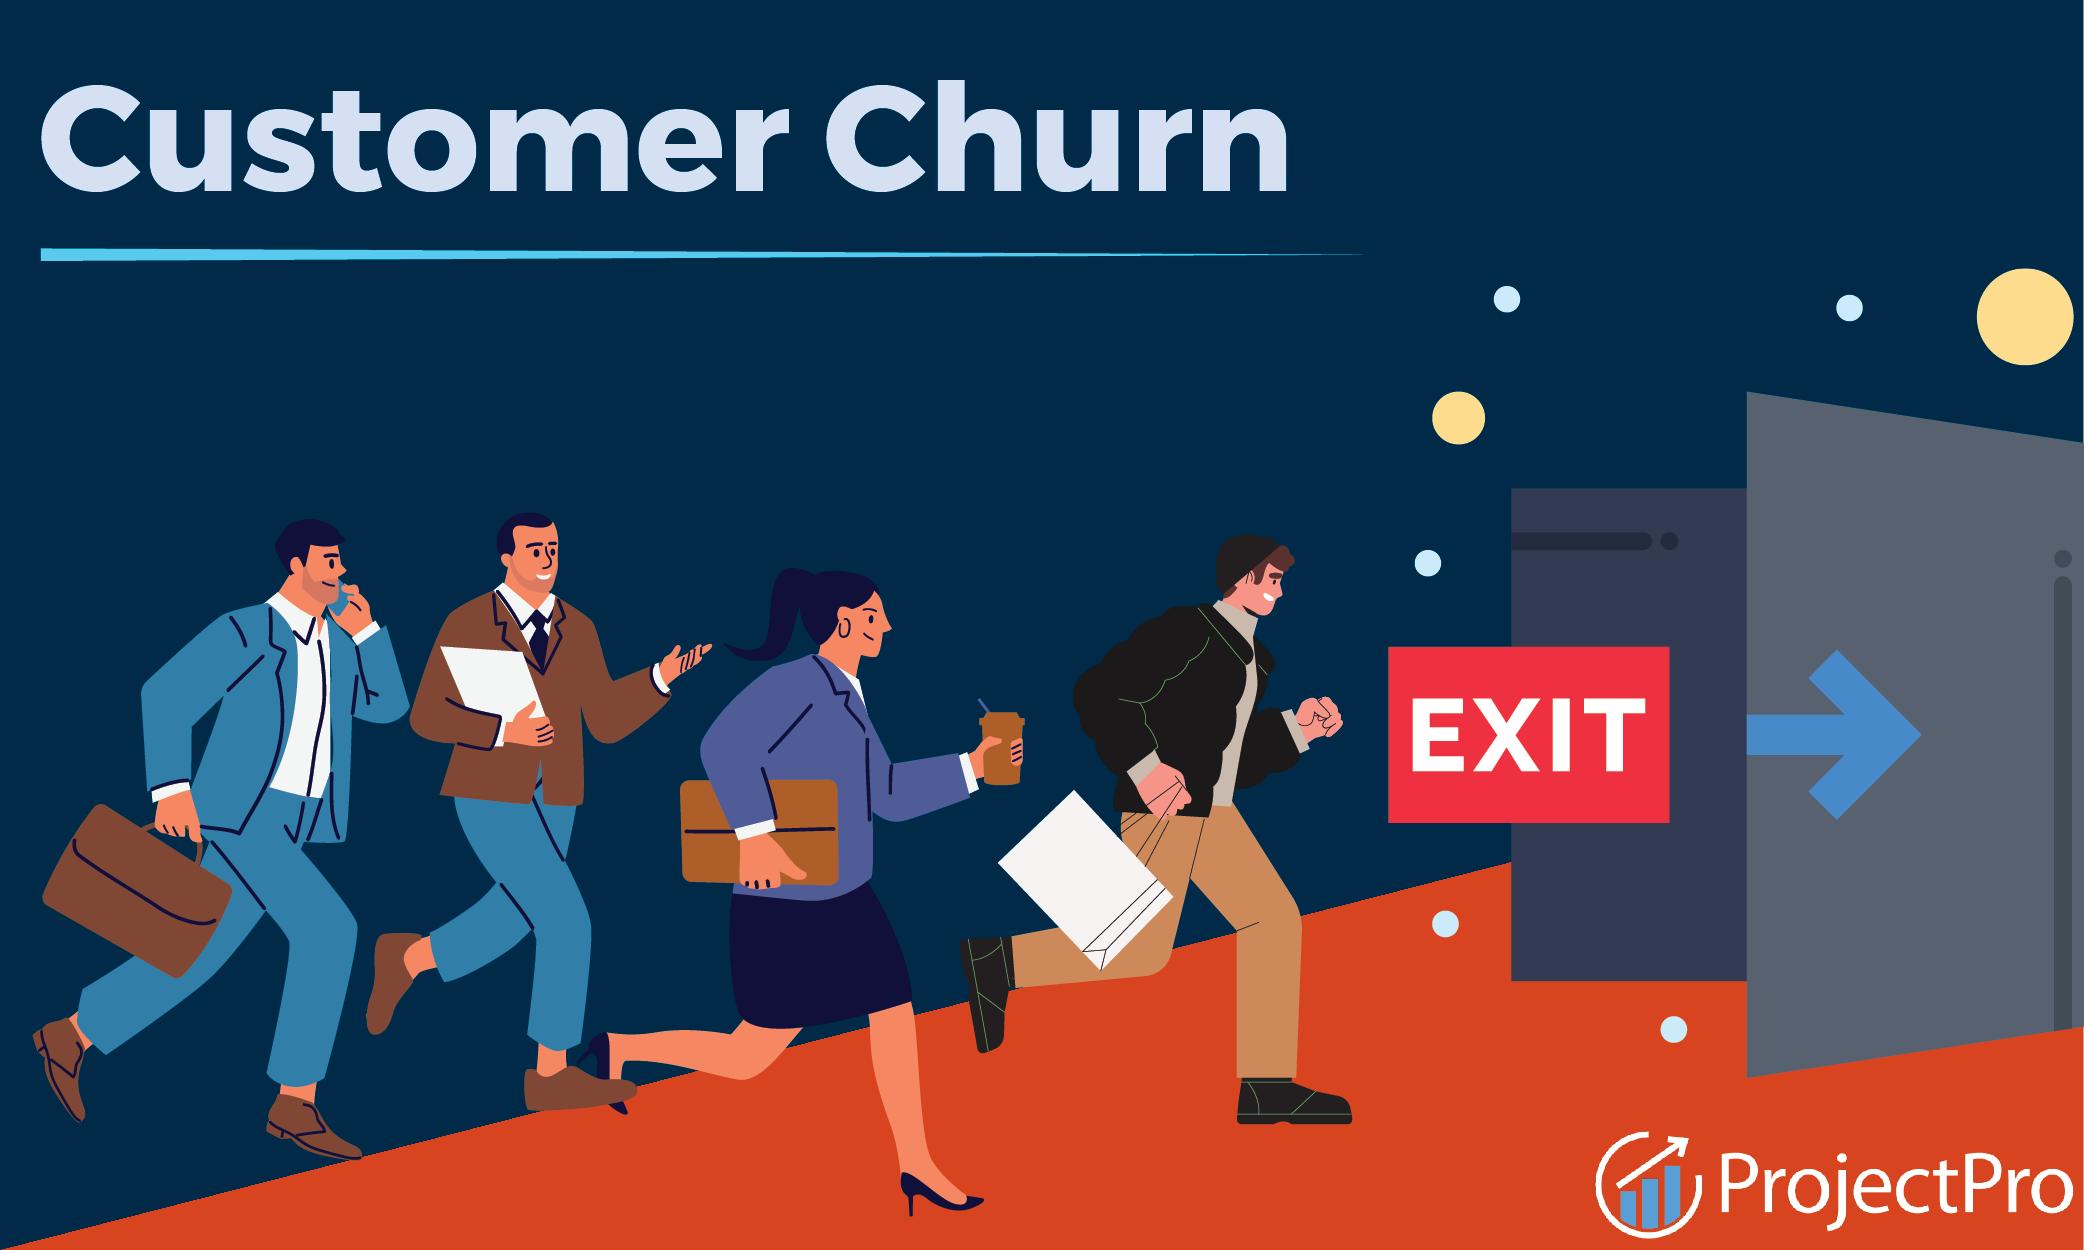


Customer churn or the rate at which customers leave a company or discontinue its services, is a vital metric for businesses. It directly impacts revenue, growth, and customer retention strategies. This notebook focuses on analyzing and predicting customer churn in a bank using a dataset that contains diverse customer attributes.

The dataset includes information such as credit score, geographic location, gender, age, tenure, account balance, number of products held, credit card ownership, activity status, estimated salary. The primary objective is to uncover key factors influencing customer churn and build a machine learning model capable of accurately predicting churn.

## Workflow

We will follow a systematic approach to explore the dataset, process the data, and develop a predictive model. Below are the steps:

### 1. **Data Loading and Exploration**
   - Load the dataset using Pandas.
   - Explore Dataset and identifying categorical and numerical columns.
   - Undersatnding the structure of the datset

### 2. **Data Cleaning and Preprocessing**
   - Check for missing or unknown values.
   - Ensure there are no duplicated values in the datset.

### 3. **Exploratory Data Analysis (EDA)**
   - Conduct in-depth analysis to identify patterns, trends, and relationships.
   - Use visualizations such as histograms, box plots, heatmaps, and scatter plots to identify key estimators for our problem.

### 4. **Feature Engineering**
   - Transformation of data using different feature engineering techniques
   - Encode categorical variables into numerical formats suitable for machine learning algorithms.
   - Scale numerical variables to improve model performance.

### 5. **Machine Learning Modeling**
   - Model building using training and testing dataset.
   - Evaluating different machine learning algorithms.
   - Performing Hyperparam tuning to get an idea of getting best results.

### 6. **Model Evaluation and Conclusion**
   - Assess the model performance using various evaluation metrics such as accuracy, precision, recall, and F1 score.

By following this approach, we aim to develop a robust machine learning model that can predict customer churn effectively.

# 1. **Dataset Description**

## **1.1 Categorical Variables**
1. **Geography**:
   - The country from which the customer belongs.
   - Example values: France, Spain, Germany.
   
2. **Gender**:
   - Customer's gender.
   - Example values: Male, Female.
   
3. **Tenure**:
   - Number of years for which the customer has been with the bank.
   - Example values: 1, 5, 10 (in years).
   
4. **HasCrCard**:
   - Binary flag indicating whether the customer holds a credit card with the bank.
   - Example values: 1 (Yes), 0 (No).
   
5. **NumOfProducts**:
   - Number of bank products the customer is utilizing.
   - Example values: 1, 2, 3.
   
6. **Exited**:
   - Binary flag: 1 if the customer closed their account with the bank, 0 if the customer is retained.
   - Example values: 1 (Exited), 0 (Retained).
   
7. **IsActiveMember**:
   - Binary flag indicating whether the customer is an active member with the bank.
   - Example values: 1 (Yes), 0 (No).
   
8. **PostExitQuestionnaire**:
   - Binary flag: Indicates if a questionnaire was distributed to the customer after exiting.
   - Example values: 1 (Distributed), 0 (Not Distributed).

---

## **1.2 Continuous Variables**
1. **CreditScore**:
   - Credit score of the customer.
   - Example values: 450, 750, 850.
   
2. **Balance**:
   - Bank balance of the customer.
   - Example values: $0.00, $50,000.00, $120,000.00.
   
3. **Age**:
   - Age of the customer.
   - Example values: 25, 40, 60.
   
4. **EstimatedSalary**:
   - Estimated salary of the customer.
   - Example values: $20,000.00, $80,000.00, $200,000.00.


# **2. Importing Libraries**

In [6394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay



# **2. Load Dataset**

In [6401]:
# Using first column as index
customers_train = pd.read_csv("data_train.csv", index_col = 0 )
customers_test = pd.read_csv("data_test.csv", index_col = 0 )

In [6403]:
customers_train.head(5) # top five rows of data set

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,PostExitQuestionnaire
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


# **3. Data Exploration + Pre-Processing** 

In [6197]:
customers_train.info() # Seems like data has no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CreditScore            8000 non-null   int64  
 1   Geography              8000 non-null   object 
 2   Gender                 8000 non-null   object 
 3   Age                    8000 non-null   int64  
 4   Tenure                 8000 non-null   int64  
 5   Balance                8000 non-null   float64
 6   NumOfProducts          8000 non-null   int64  
 7   HasCrCard              8000 non-null   int64  
 8   IsActiveMember         8000 non-null   int64  
 9   EstimatedSalary        8000 non-null   float64
 10  Exited                 8000 non-null   int64  
 11  PostExitQuestionnaire  8000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 812.5+ KB


In [6406]:
customers_train["Geography"].value_counts()

Geography
France     4010
Spain      1995
Germany    1995
Name: count, dtype: int64

In [6408]:
customers_train["Gender"].value_counts()

Gender
Male      4343
Female    3657
Name: count, dtype: int64

In [6410]:
def convert_to_category(data_train, data_test, columns):
    
    for column in columns:
        data_train[column] = data_train[column].astype("category")
        data_test[column] = data_test[column].astype("category")
    
    return data_train, data_test
    
columns_to_convert = ['Gender', 'Geography']
customers_train, customers_test = convert_to_category(customers_train, customers_test, columns_to_convert)


In [6412]:
customers_train.isna().sum() # No missing or null values 

CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
PostExitQuestionnaire    0
dtype: int64

In [6414]:
customers_train.duplicated().sum() # No duplicate values

0

In [6416]:
customers_train.describe().T # Descriptive stats for our datset descriving mean, std deviation and other measures

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0,650.179625,96.844314,350.00,583.00,651.000,717.0000,850.00
Age,8000.0,38.937875,10.511224,18.00,32.00,37.000,44.0000,92.00
Tenure,8000.0,5.012750,2.884376,0.00,3.00,5.000,7.0000,10.00
Balance,8000.0,76800.037193,62391.192584,0.00,0.00,97658.060,127827.3325,250898.09
NumOfProducts,8000.0,1.528000,0.583102,1.00,1.00,1.000,2.0000,4.00
HasCrCard,8000.0,0.701625,0.457574,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,8000.0,0.512625,0.499872,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,8000.0,100198.588701,57524.002768,11.58,51271.41,100272.165,149372.3875,199992.48
Exited,8000.0,0.205875,0.404365,0.00,0.00,0.000,0.0000,1.00
PostExitQuestionnaire,8000.0,0.183750,0.387304,0.00,0.00,0.000,0.0000,1.00


In [6418]:
# Function to rename columns and set them to lowercase
def preprocess_columns(df, mapper):
    df.rename(columns=mapper, inplace=True)
    df.columns = df.columns.str.lower()
    return df

# Column mapping
customers_mapper = {
    "CreditScore": "credit_score", 
    "NumOfProducts": "num_of_products", 
    "HasCrCard": "has_credit_card",
    "IsActiveMember": "is_active_member", 
    "EstimatedSalary": "estimated_salary", 
    "PostExitQuestionnaire": "post_exit_questionnaire"
}

# Apply preprocessing to both train and test datasets
customers_train = preprocess_columns(customers_train, customers_mapper)
customers_test = preprocess_columns(customers_test, customers_mapper)

# Print test columns to confirm
print(customers_train.columns)


Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited', 'post_exit_questionnaire'],
      dtype='object')


# **4.1 EDA (Exploratory Data Analysis)**

# **4.1.1 Univariate Analysis**

To start the analysis, we will first perform **univariate analysis** on the dataset. This involves examining individual variables to understand their distributions and key characteristics.

- **Categorical Variables**: We will analyze variables like `Geography`, `Gender`,`NumOfProducts`,`Tenure`,`PostExitQuestionnaire` `IsActiveMember`, `HasCrCard` and our target variable `Exited` using count plots to visualize the frequency of each category.
- **Continuous Variables**: For variables like `CreditScore`, `Balance`, and `Age`, we will use histograms and box plots to observe their distributions, outliers, and overall trends.


In [6422]:

def plot_countplots(df, columns, titles, figsize=(20, 25)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # You can change this if you prefer a different layout
    n_rows = (len(columns) + 1) // n_cols  # To ensure enough rows for all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.countplot(x=col, data=df, palette="Set2", legend = False, hue = col)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Example usage:
columns = ['geography', 'gender', 'tenure',
       'num_of_products', 'has_credit_card', 'is_active_member', 'exited', "post_exit_questionnaire"]

titles = [
    'Customer Geography Distribution',
    'Customer Gender Breakdown',
    'Customer Tenure Distribution',
    'Number of Products Owned by customers_train',
    'Credit Card Ownership Distribution',
    'Active vs. Inactive Membership',
    'Customer Exit Distribution',
    'Distribution of Post-Exit Questionnaire Responses'
]



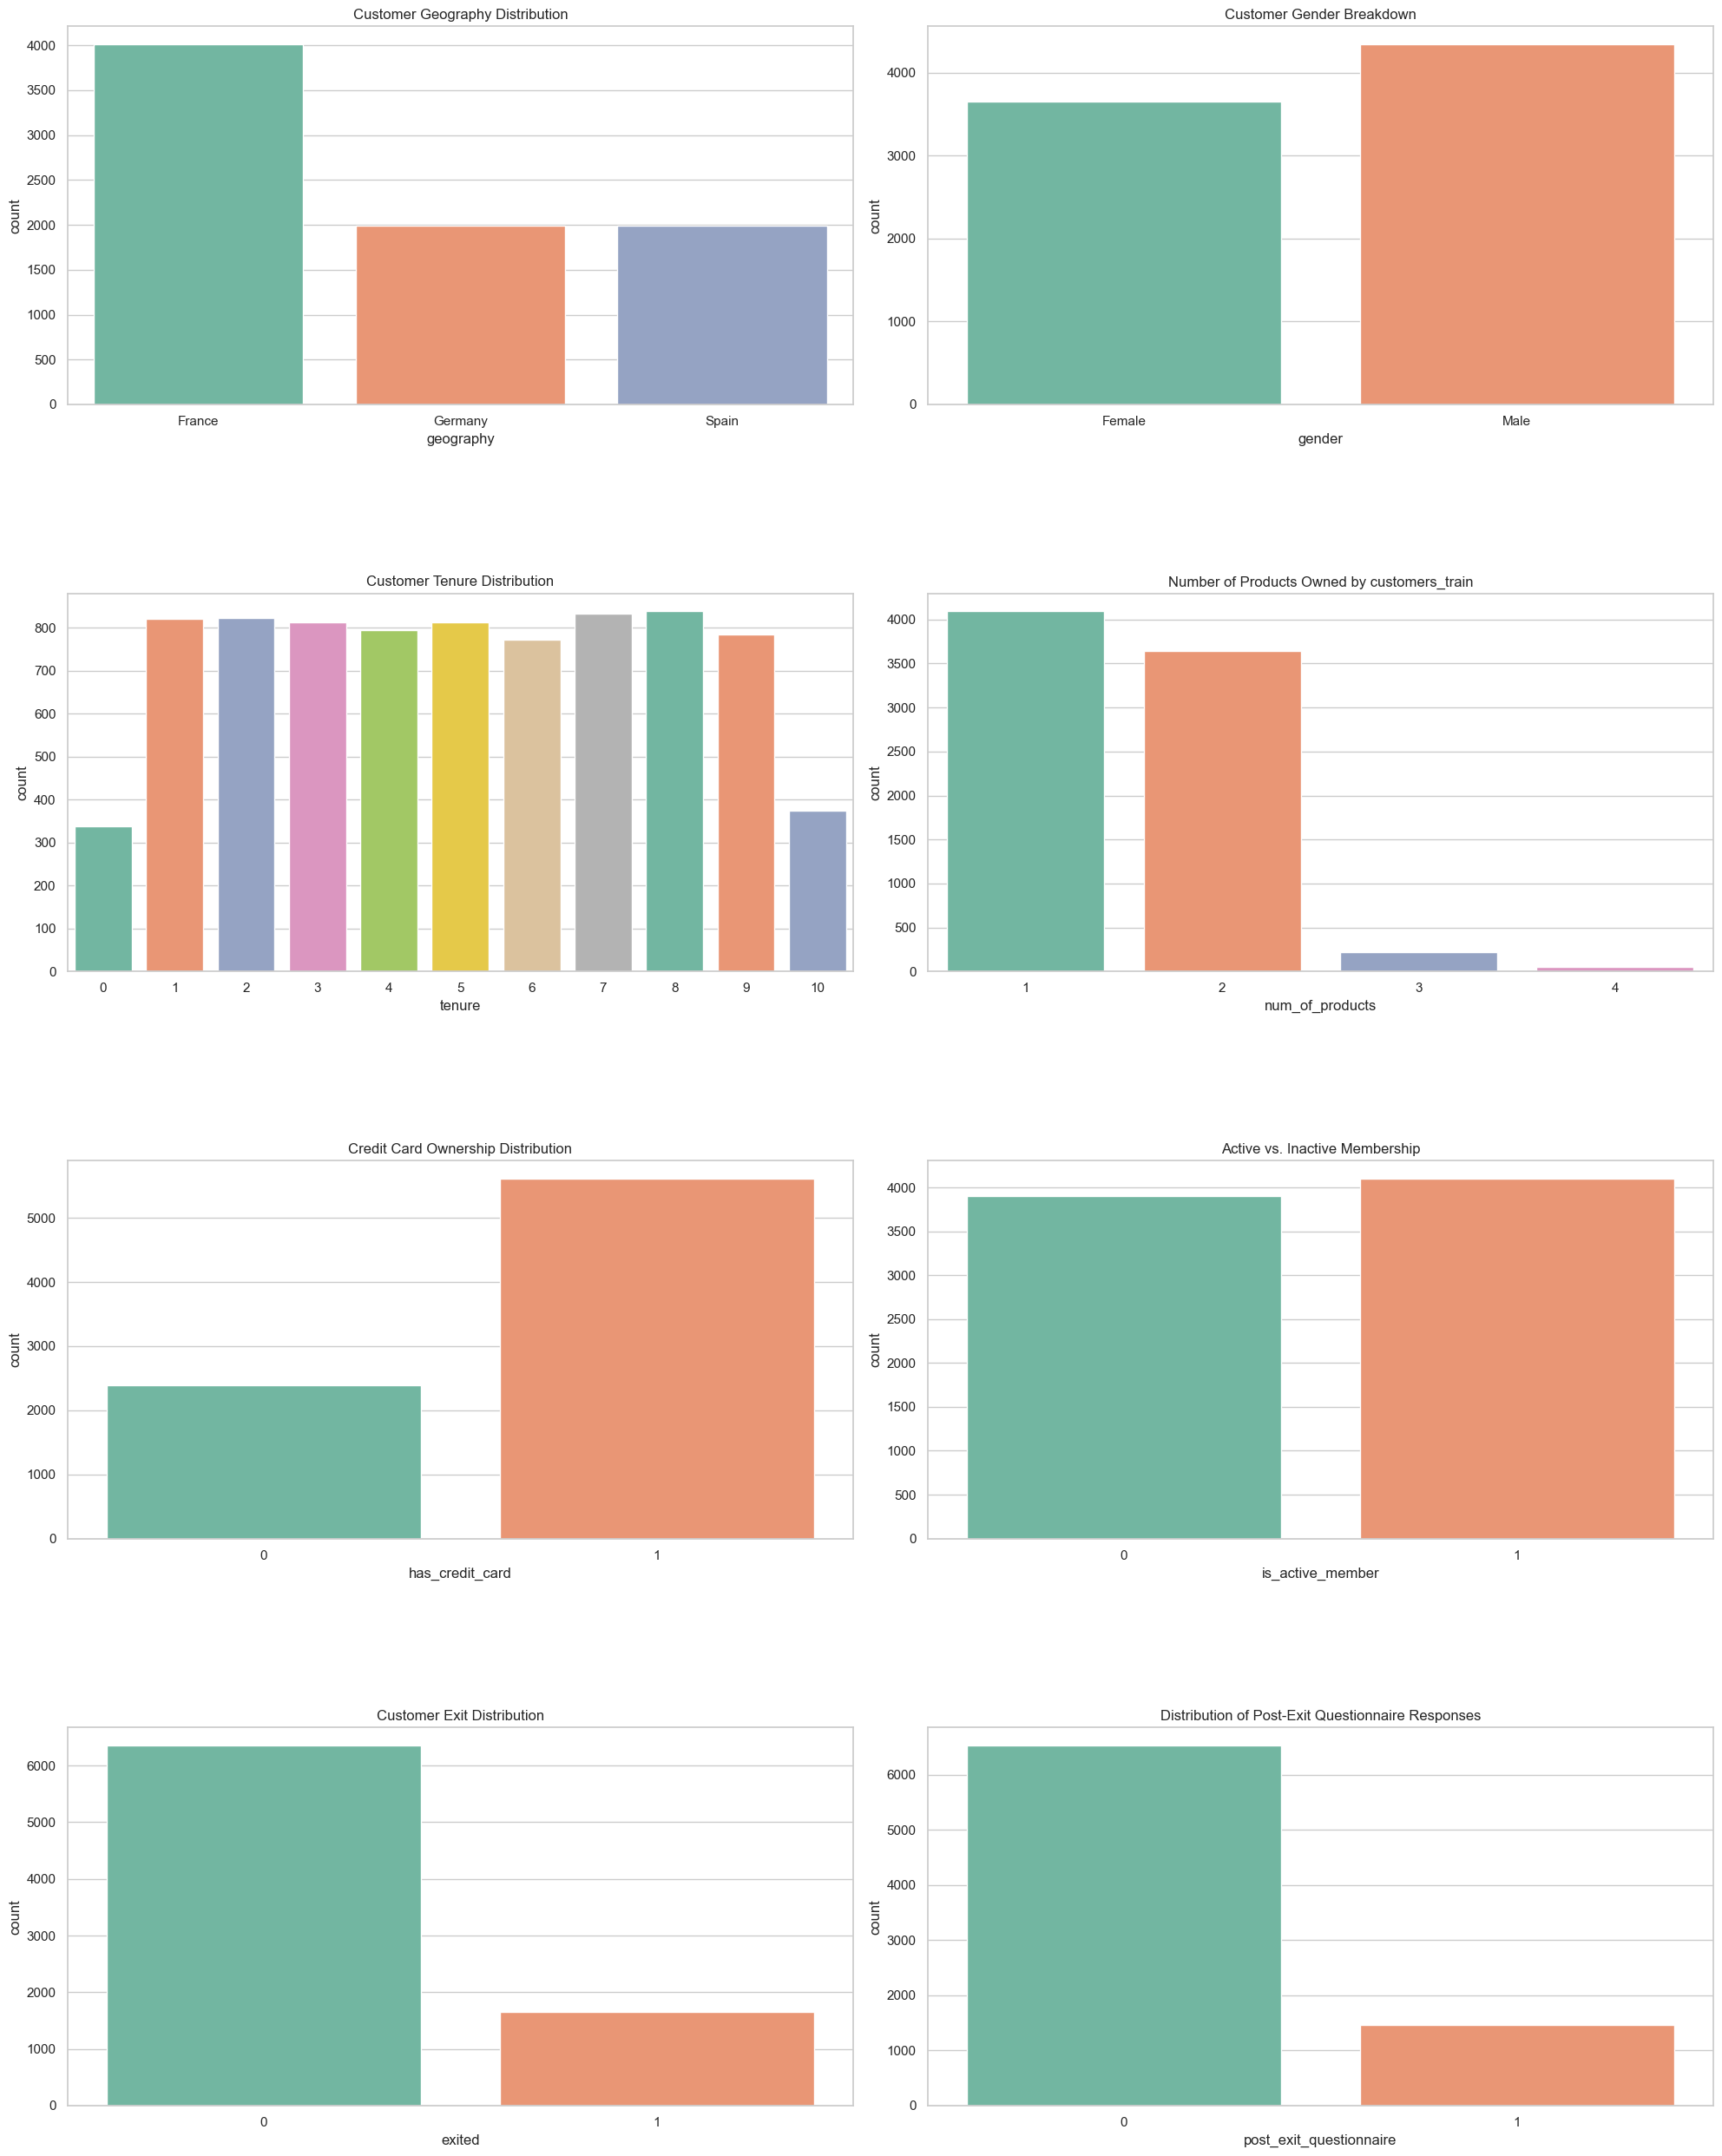

In [6424]:
plot_countplots(customers_train, columns, titles)

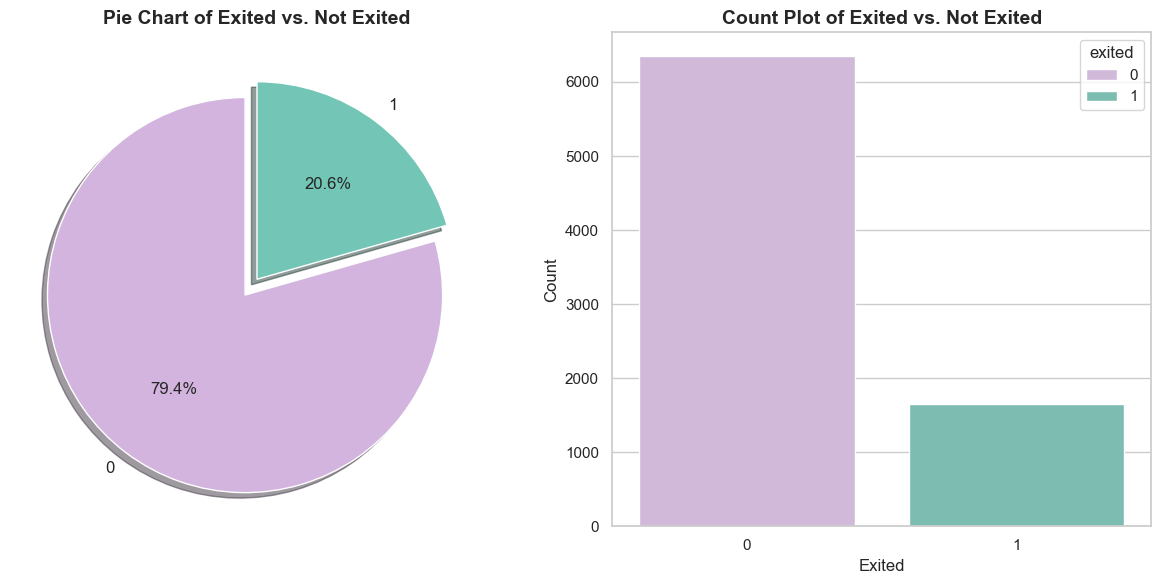

In [6426]:
exit_count = customers_train['exited'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Pie Chart
colors = ['#d2b4de', '#73c6b6']  # Stylish colors
explode = (0.1, 0)  # Explode the first slice slightly
exit_count.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    labels=exit_count.index,
    shadow=True,
    fontsize=12,
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('Pie Chart of Exited vs. Not Exited', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')  # Remove y-label for the pie chart

# Count Plot
sns.countplot(
    x='exited',
    data=customers_train,
    palette=colors,
    hue = 'exited',
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('Count Plot of Exited vs. Not Exited', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Exited')  # Label for x-axis
axes[1].set_ylabel('Count')  # Label for y-axis


plt.tight_layout()
plt.show()


In [6428]:
exit_distribution = customers_train['exited'].value_counts()
exit_percentage = customers_train['exited'].value_counts(normalize=True) * 100

# Combine into a DataFrame for easier presentation
exit_summary = pd.DataFrame({
    'Count': exit_distribution,
    'Percentage (%)': exit_percentage
})


geo_distribution = customers_train['geography'].value_counts()
geo_percentage = customers_train['geography'].value_counts(normalize=True) * 100

# Combine into a DataFrame for easier presentation
geo_summary = pd.DataFrame({
    'Count': geo_distribution,
    'Percentage (%)': geo_percentage
})

gender_distribution = customers_train['gender'].value_counts()
gender_percentage = customers_train['gender'].value_counts(normalize=True) * 100

# Combine into a DataFrame for easier presentation
gender_summary = pd.DataFrame({
    'Count': gender_distribution,
    'Percentage (%)': gender_percentage
})

geo_summary


,Count,Percentage (%)
geography,,
France,4010,50.1250
Germany,1995,24.9375
Spain,1995,24.9375


In [6430]:
exit_summary

,Count,Percentage (%)
exited,,
0,6353,79.4125
1,1647,20.5875


In [6432]:
gender_summary

,Count,Percentage (%)
gender,,
Male,4343,54.2875
Female,3657,45.7125



## **Key Observations from CountPlots of Categorical Variables**

### **Target Variable (`Exited`)**
- **Observation**:
  - The dataset is **imbalanced** with respect to the `Exited` variable as almost **80% of the people belong to category who has not exited**.
  - A significantly larger number of customers have not exited the bank compared to those who have.
- **Implications**:
  - The imbalance may introduce bias in the predictive model, favoring the majority class. We would need to **balance the dataset** to handle bias later in our model building stages.

---

### **Geography**
- **Observation**:
  - Half of the customers belong to **France (50.12%)** , with fewer from **Spain(24.93%)** and **Germany(24.93%)**.
- **Implications**:
  - This imbalance could introduce regional bias in predictions.
  - Investigate the relevance of geography to the target variable (`Exited`).

---

### **Number of Products**
- **Observation**:
  - Most customers utilize **1 or 2 products**.
  - Very few customers use more than 2 products.
- **Implications**:
  - The limited variability in this feature might affect its predictive power.
  - Examine the relationship between the number of products and customer exit rates to determine its significance.

---

### **Credit Card Ownership (`HasCrCard`)**
- **Observation**:
  - Almost **twice as many customers own a credit card** compared to those who do not.
- **Implications**:
  - Though this feature looks  imbalanced, we wil explore it further in relation to `Exited` column.

---

### **Post Exit Questionnaire (`PostExitQuestionnaire`)**
- **Observation**:
  - Follows the same distribution as the 'Exited' column, suggesting almost all of the customers who exited were given these questionnaires.
- **Implications**:
  - Though this feature looks  imbalanced, **dropping this column** seems the valid option as it doesn't affect the exit status of a customer before and also it will introduce bias in our model and model will not be able to learn from other features.
---

### **Other Variables**
- **Observation**:
  - Variables like `Gender` **(Male 52.28% and Female 45.71%)**, `IsActiveMember`, and `Tenure` appear **balanced** across categories.
- **Implications**:
  - These variables are unlikely to introduce significant bias.
- **Recommendation**:
  - Retain these variables as is for further analysis.

---


In [6436]:
def plot_histplots(df, columns, titles, figsize=(20, 12)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # You can change this if you prefer a different layout
    n_rows = (len(columns) + 1) // n_cols  # To ensure enough rows for all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.histplot(df[col], kde=True, bins=30, color='#48c9b0')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, columns, titles, figsize=(20, 12)):
    """
    Function to plot box plots for the given columns.
    """
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(columns) + 1) // n_cols  # Calculate rows required to fit all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.boxplot(y=df[col], color='#abebc6')
        plt.ylabel(col.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()




# Example usage:
columns = ['credit_score','age', 'balance','estimated_salary']

titles = [
    'Customer Credit Score Distribution',
    'Customer Age Distribution',
    'Customer Balance Distribution',
    'Customer Estimated Salary Distribution'
]

box_plot_titles = [
    'Customer Credit Score Distribution (Box Plot)',
    'Age Distribution (Box Plot)',
    'Balance Distribution (Box Plot)',
    'Estimated Salary Distribution (Box Plot)'
]

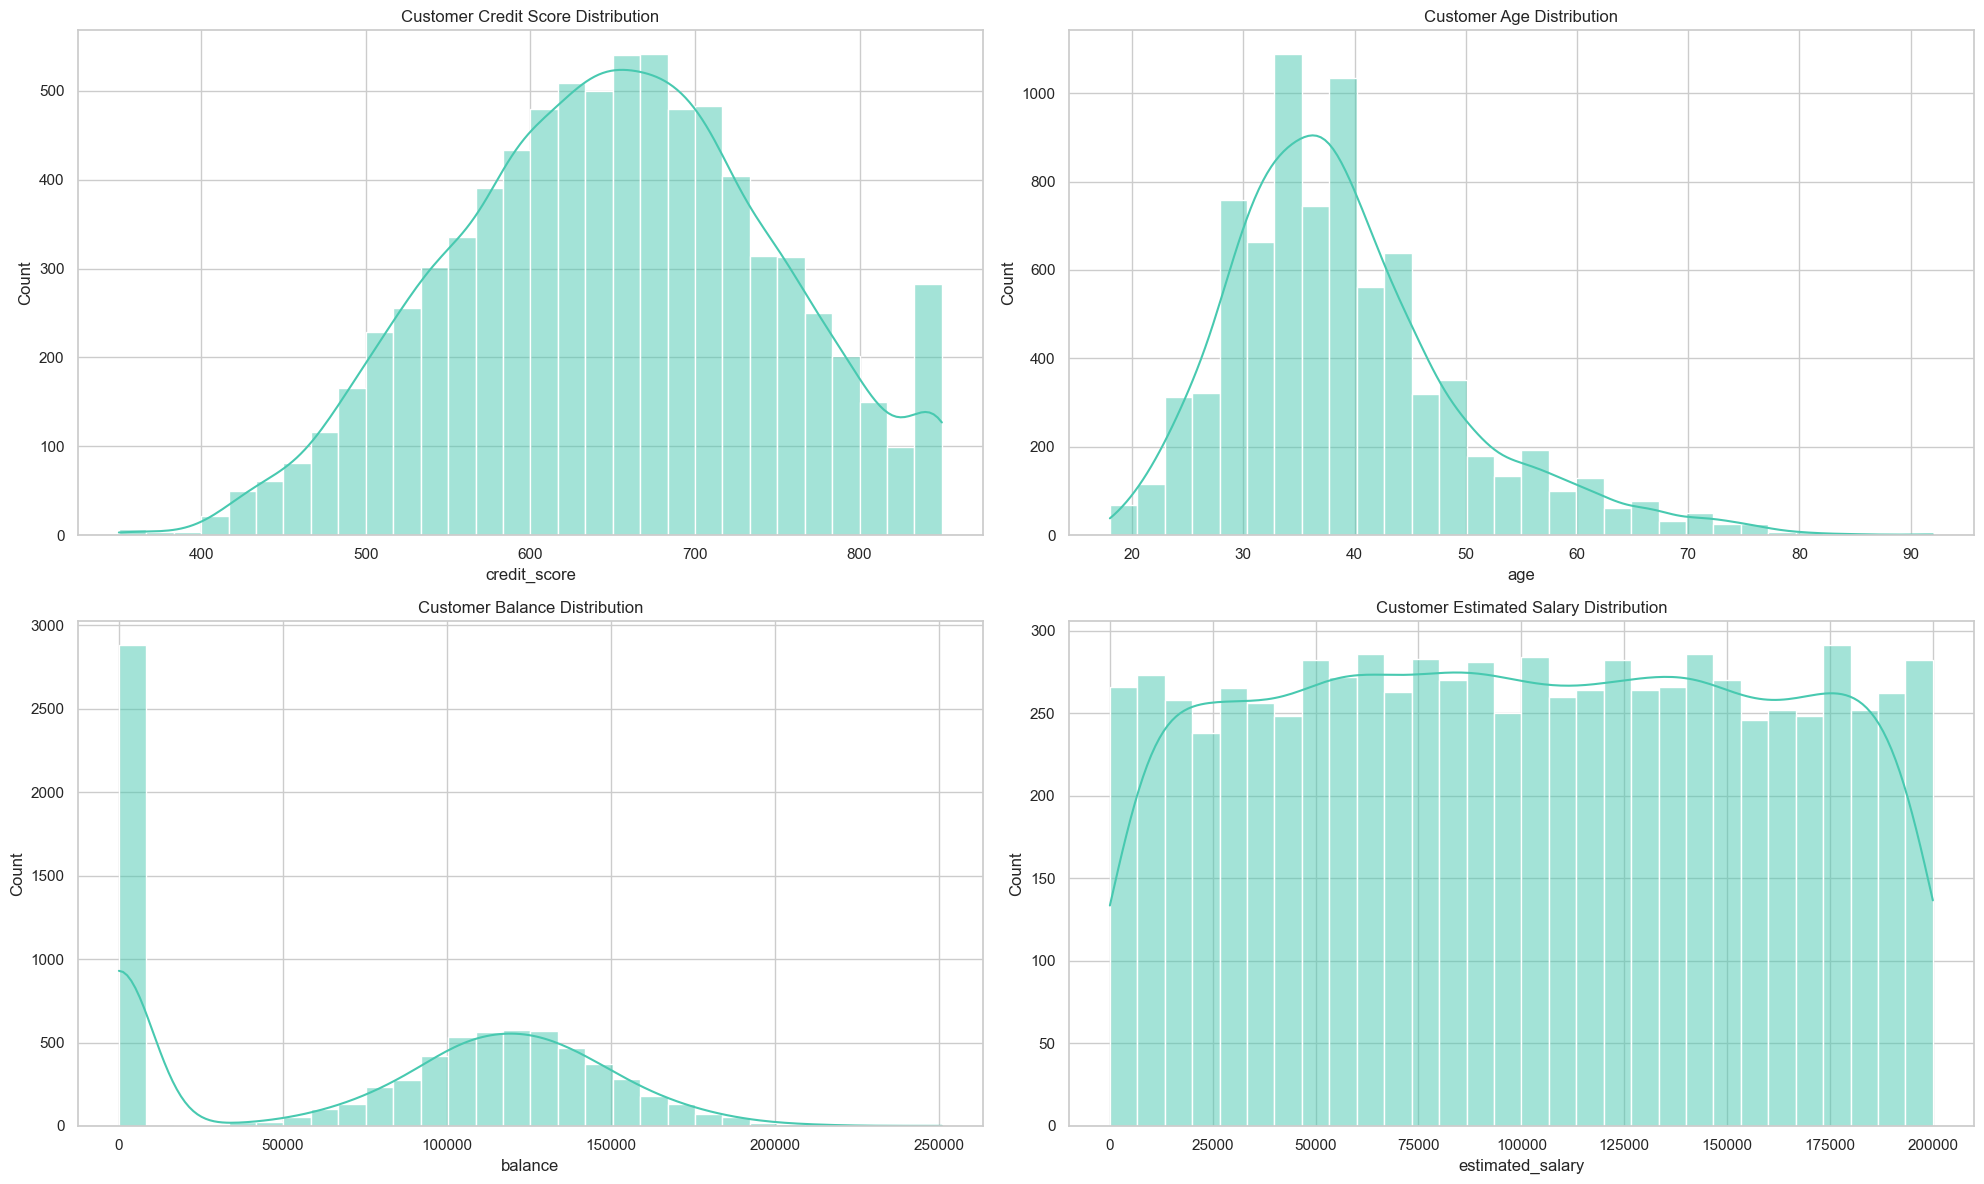

In [6438]:
plot_histplots(customers_train, columns, titles)

We notice there are many customers who have **zero balance** so maybe we can create another feature from it but for now I am including the info if the user has zero balance or not to have more predictive power. We will explore it later. Moreover, the age column look right skewed. We will perform some transformation method on it to make its distribution look normally distributed. Credit score column also looks a little bit skewed from left

In [6441]:
zero_balance_customers = customers_train[customers_train["balance"] == 0].value_counts().sum()
zero_balance_customers

2880

In [6443]:
total_customers = len(customers_train)
zero_balance_customer_pct = (zero_balance_customers / total_customers) * 100
zero_balance_customer_pct

36.0

## **Key Observations from above Histograms of Continuos Variables**

### **Credit Score**
- Most customers have credit scores between **600 and 750**, which looks pretty normal.
- A few customers have scores below 500 – these might be at higher risk of exiting and are worth paying attention to.

### **Age**
- Most customers are in their **30s and 40s**. This seems to be the main age group for the bank’s customers.

### **Balance**
- **36%(2800)** customers have **zero balance**, which might mean they are inactive or not engaging much with the bank.
- For those with balances, the distribution is fairly wide, peaking around $100,000. This could represent active, high-value customers.

### **Estimated Salary**
- The salary data is **evenly spread (almost uniform)**, with no major peaks. 
- It doesn’t seem like salary will introduce any bias into the model, but it’s still worth checking its relationship with churn.

---

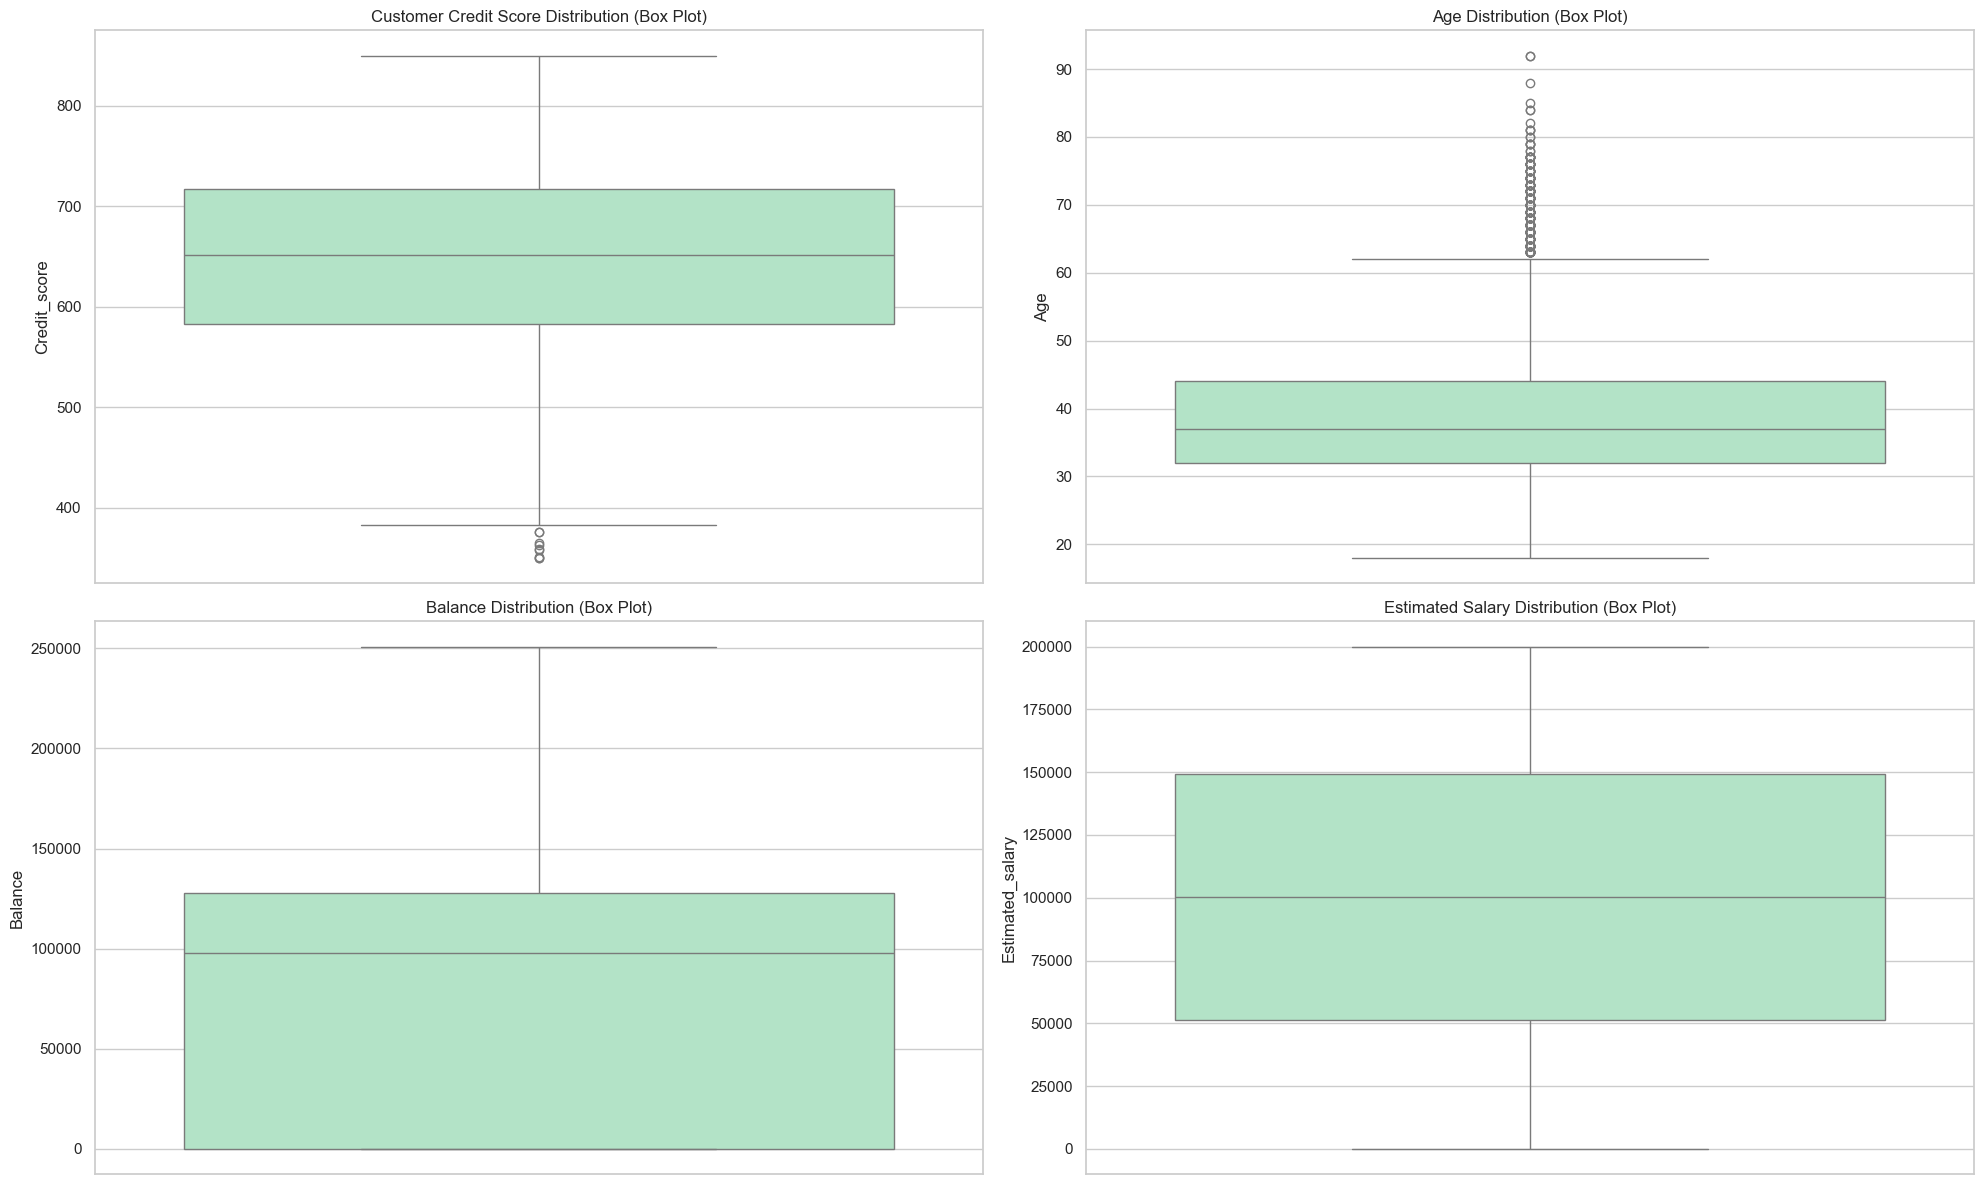

In [6446]:
# Call the function with your dataframe
plot_boxplots(customers_train, columns, box_plot_titles)

## **Insights from Boxplots of Continuos Variables**

### **Credit Score Distribution**
- **Observations**:
  - A few outliers below 400 indicate customers with exceptionally low credit scores.
  - These low-credit-score customers might require special attention as they could represent a higher risk of exiting.
  - Most customers have a good credit history, suggesting potential stability in retention rates.

---

### **Age Distribution**
- **Observations**:
  - The median age is approximately **37-39 years**, with the majority of customers in the 32-43 age range.
  - A small number of **outliers exist above 62**, representing older customers.
  - Middle-aged customers look like  the primary focus group for retention strategies.

---

### **Balance Distribution**
- **Observations**:
  - The median balance is around **$100,000**(assuming its in dollars), with no visible outliers.
  - The distribution appears well-spread across the customer base.
  - customers with very low balances could be at risk of churn and require targeted engagement strategies. We would need to explore it further in bivariate analysis

---

### **Estimated Salary Distribution**
- **Observations**:
  - The salary distribution is almost uniform, with most customers earning between **\$50k** and **\$150k**.
  - No significant outliers are present in this variable.
  - Salaries are unlikely to introduce bias into the model.

---

# **4.1.2 Bivariate and Multivariate Analysis**

After understanding individual variables, we will proceed with **bivariate** and **multivariate analysis** to explore relationships between variables.

## **1. Bivariate Analysis**
In bivariate analysis, we will try to see how one variable relates to another. Here’s what we’ll explore:
- **Categorical vs. Target (`Exited`)**:
  - **Count plots** to study the relationship between variables like `Geography`, `Gender`,`NumOfProducts`,`Tenure`, `Exited`, `IsActiveMember`  and `HasCrCard`.
  
- **Continuous vs. Target (`Exited`)**:
  - **Box plots** to see how continuous variables like `CreditScore`, `Age`, or `Balance` vary for `Exited` (1 vs. 0).

- **Continuous vs. Continuous (Using Pairplot)**:
  - Use **scatter plots** to explore correlations between continuous variables like `Balance` and `EstimatedSalary`.
---

## **2. Multivariate Analysis**

- **Correlation Between Continuous Variables**:
  - Use a **heatmap** to visualize pairwise correlations between continuous variables like `CreditScore`, `Age`, `Balance`, and `EstimatedSalary`.
  - Example: Identify strong correlations that might impact the model.


In [6450]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplots_with_target(df, columns, target_col, titles, figsize=(15, 18)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(columns) + 1) // n_cols  # Calculate rows required to fit all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.countplot(data=df, x=col, hue=target_col, palette="Set1")
        plt.xlabel(col.capitalize())
        plt.ylabel("Count")
        plt.legend(title=target_col.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Example usage
columns = ['geography', 'gender', 'num_of_products', 'tenure', 'is_active_member', 'has_credit_card']
titles = [
    'Customer Geography Distribution by Exited',
    'Customer Gender Distribution by Exited',
    'Number of Products Distribution by Exited',
    'Customer Tenure Distribution by Exited',
    'Active Membership Status by Exited',
    'Credit Card Ownership by Exited'
]


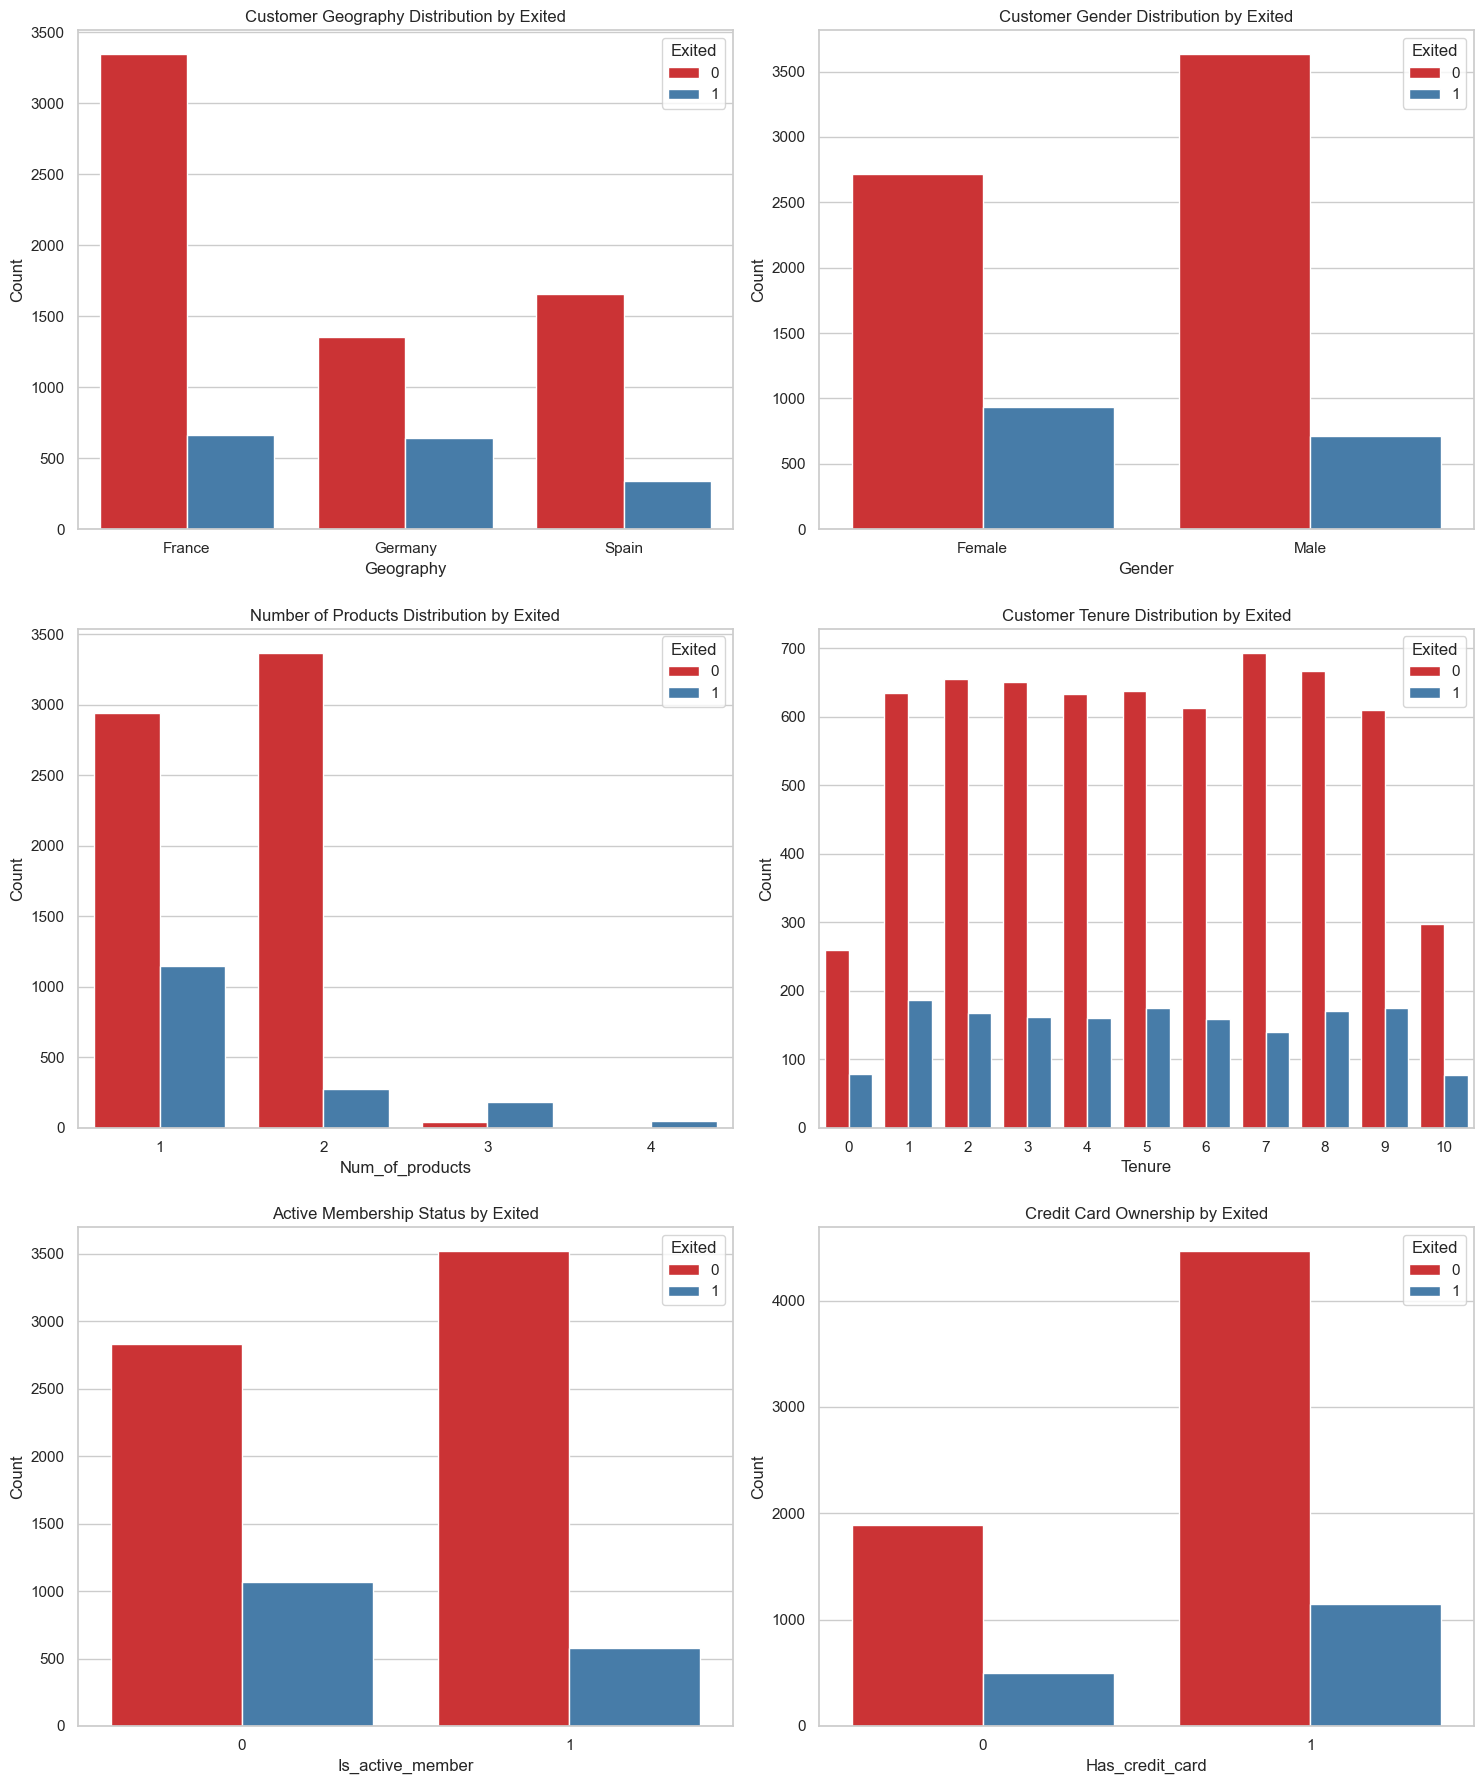

In [6452]:
plot_barplots_with_target(customers_train, columns, target_col='exited', titles=titles)

In [6453]:
# Compute churn rate by geography
churn_rate_by_geography = customers_train.groupby('geography', observed=False)['exited'].mean() * 100

# Convert the result to a DataFrame
churn_rate_df = churn_rate_by_geography.reset_index()

# Rename the columns for better readability
churn_rate_df.columns = ['Geography', 'Churn Rate (%)']

# Display the DataFrame
churn_rate_df

,Geography,Churn Rate (%)
0,France,16.558603
1,Germany,32.280702
2,Spain,16.992481


## **Insights from Count Plots of Categorical Variables**

### **Geography**
- **Observation**:
  - customers from **France** form the majority, followed by Spain and Germany.
  - Germany shows an avg twice higher proportion of **exited customers(32.28%)** compared to France and Spain.
  - Geography might influence churn rates, but we do need to look at other factors to conclude this.

---

### **Gender**
- **Observation**:
  - Both male and female customers are well-represented.
  - Female customers appear to have a slightly higher churn rate compared to male customers.
  - Gender differences do not tell that much about customer's churn.

---

### **Number of Products**
- **Observation**:
  - Most customers use **1 or 2 products**.
  - customers with **1 product** have a higher churn rate as compared to other but many people use such number of products too, so doesn't give that much insight
  - Number of products used do not give a deep insight for a strong insight in churn classsification.

---

### **Tenure**
- **Observation**:
  - Tenure is distributed fairly evenly, but no clear trend is observed in its relationship with churn.
  - Tenure may not be a strong predictor of churn by itself but could interact with other features.

---

### **IsActiveMember**
- **Observation**:
  - Active members have a significantly lower churn rate compared to inactive members.
  - Mild indicator of churn, with inactive members at a bit higher risk.

---

### **HasCreditCard**
- **Observation**:
  - customers with credit cards are the majority, but churn rates are similar regardless of credit card ownership.
- **Implications**:
  - Credit card ownership may not strongly influence churn but may have relationship with other features.

---

## **Conclusion**
- While some variables, like `IsActiveMember` and `Geography`, provide some insights into churn behavior, others, like `Tenure` and `HasCreditCard`, show less clear patterns.
- Churn appears to be influenced by a combination of factors rather than any single variable.

---




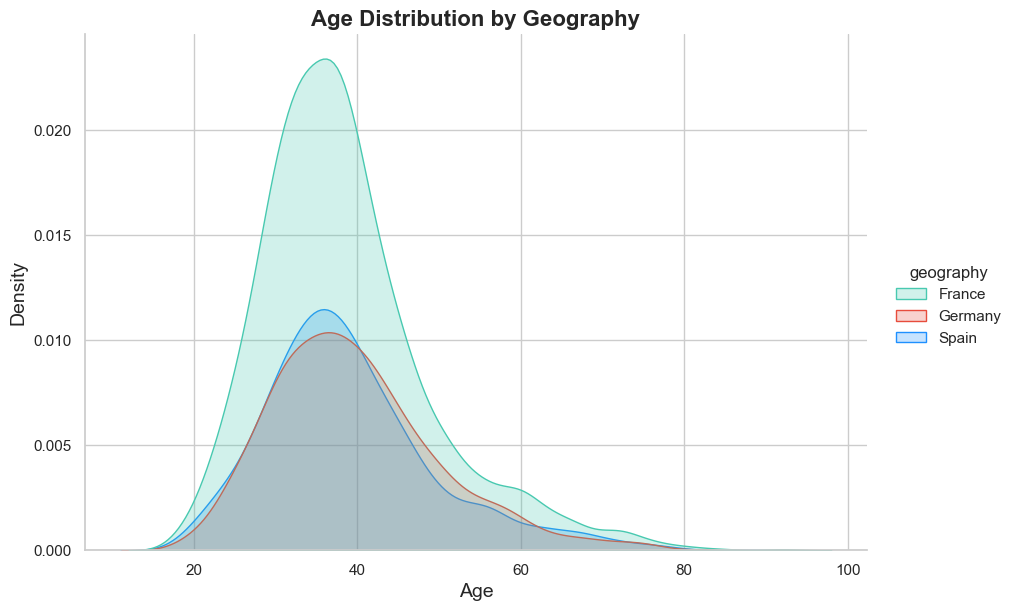

In [6457]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Create the displot
sns.displot(
    data=customers_train,
    x='age',
    hue='geography',  # Different regions
    kind='kde',       # Kernel Density Estimate plot
    fill=True,        # Fill the areas under the curves
    palette=['#48c9b0', '#e74c3c', '#1E90FF'],  # Nice colors for regions
    height=6,         # Adjust height
    aspect=1.5        # Adjust aspect ratio
)

# Add labels and title
plt.title('Age Distribution by Geography', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


Based on the above Plot, we see that the age between 25 to 50 is most dense for the country of France as its numbers were also more in the dataset.

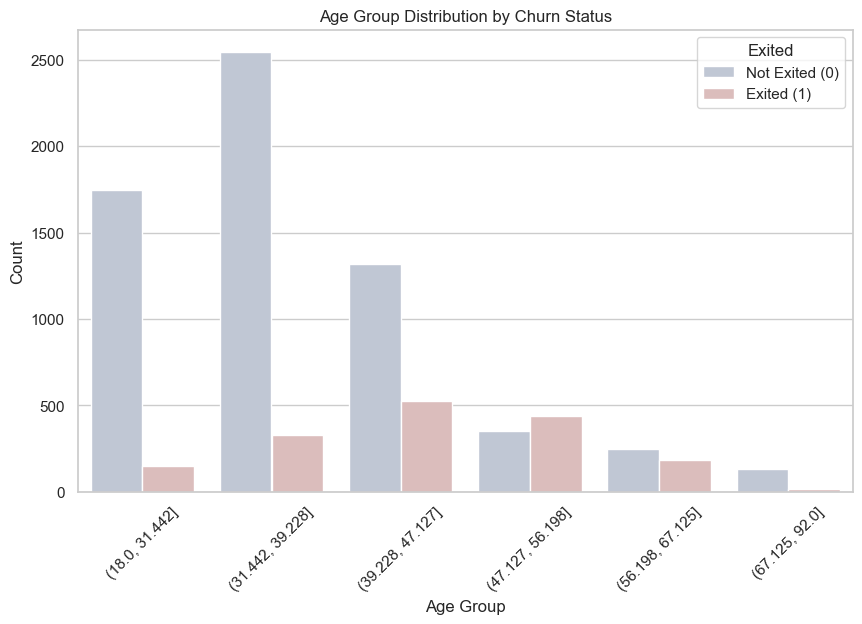

In [6460]:
# Initialize KBinsDiscretizer with desired settings
discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans', subsample=None)

# Fit the discretizer on the training data and transform both train and test data
customers_train['age_code'] = discretizer.fit_transform(customers_train[['age']])
customers_train['age_group'] = pd.cut(x=customers_train['age'],
                                    bins=discretizer.bin_edges_[0].tolist())
customers_test['age_code'] = discretizer.transform(customers_test[['age']])
customers_test['age_group'] = pd.cut(x=customers_train['age'],
                                    bins=discretizer.bin_edges_[0].tolist())


# Create a count plot for age groups with hue for 'Exited'
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_train, x='age_group', hue='exited', palette='vlag')
plt.title('Age Group Distribution by Churn Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.show()

In [6461]:
customers_train.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,post_exit_questionnaire,age_code,age_group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2.0,"(39.228, 47.127]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,2.0,"(39.228, 47.127]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,2.0,"(39.228, 47.127]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1.0,"(31.442, 39.228]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,2.0,"(39.228, 47.127]"


Based on the above data we see, that most of the customers who have exited lie in between 46-55 range

In [6467]:
# Compute churn rate by age group
churn_rate_age = customers_train.groupby('age_group', observed=False)['exited'].mean() * 100

# Compute total frequency of each age group
total_frequency = customers_train['age_group'].value_counts()

# Compute frequency of customers who have exited for each age group
exited_frequency = customers_train[customers_train['exited'] == 1]['age_group'].value_counts()

# Create a DataFrame from these values
churn_rate_age_df = churn_rate_age.reset_index()
churn_rate_age_df.columns = ['Age Group', 'Churn Rate (%)']

# Add total frequency and exited frequency columns
churn_rate_age_df['Total Customers'] = churn_rate_age_df['Age Group'].map(total_frequency)
churn_rate_age_df['Exited Customers'] = churn_rate_age_df['Age Group'].map(exited_frequency)

# # Fill any missing values (if some age groups have no exited customers)
# churn_rate_age_df['Exited Frequency'] = churn_rate_age_df['Exited Frequency'].fillna(0).astype(int)

# Display the DataFrame
churn_rate_age_df


,Age Group,Churn Rate (%),Total Customers,Exited Customers
0,"(18.0, 31.442]",7.720783,1891,146
1,"(31.442, 39.228]",11.501042,2878,331
2,"(39.228, 47.127]",28.579176,1844,527
3,"(47.127, 56.198]",55.822785,790,441
4,"(56.198, 67.125]",42.361111,432,183
5,"(67.125, 92.0]",11.920530,151,18


### **Age Group Analysis**

The analysis shows that the **46-55** and **56-65** age groups have the highest churn rates, around **48%** and **52%** respectively. This means these customers are more likely to leave compared to others. 

Younger groups like **0-25** and **26-35** have much lower churn rates, around **8%** and **7%**, while the **36-45** group has a moderate churn rate of **18%**. The **66+** group also shows a moderate churn rate of about **16%**.

This suggests we should focus more on understanding why middle-aged and older customers are leaving and find ways to keep them engaged.


In [6470]:
def plot_boxplots_with_target(df, continuous_vars, target_col, titles, figsize=(12, 10)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(continuous_vars) + 1) // n_cols  # Calculate rows required to fit all variables
    
    # Loop through the continuous variables and their corresponding titles
    for i, (cont_var, title) in enumerate(zip(continuous_vars, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x=target_col, y=cont_var, palette="crest", hue = target_col)
        plt.title(title)
        plt.xlabel(target_col.capitalize())
        plt.ylabel(cont_var.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Example usage
continuous_vars = ['credit_score', 'age', 'balance', 'estimated_salary']
titles = [
    'Credit Score Distribution by Exited',
    'Age Distribution by Exited',
    'Balance Distribution by Exited',
    'Estimated Salary Distribution by Exited'
]

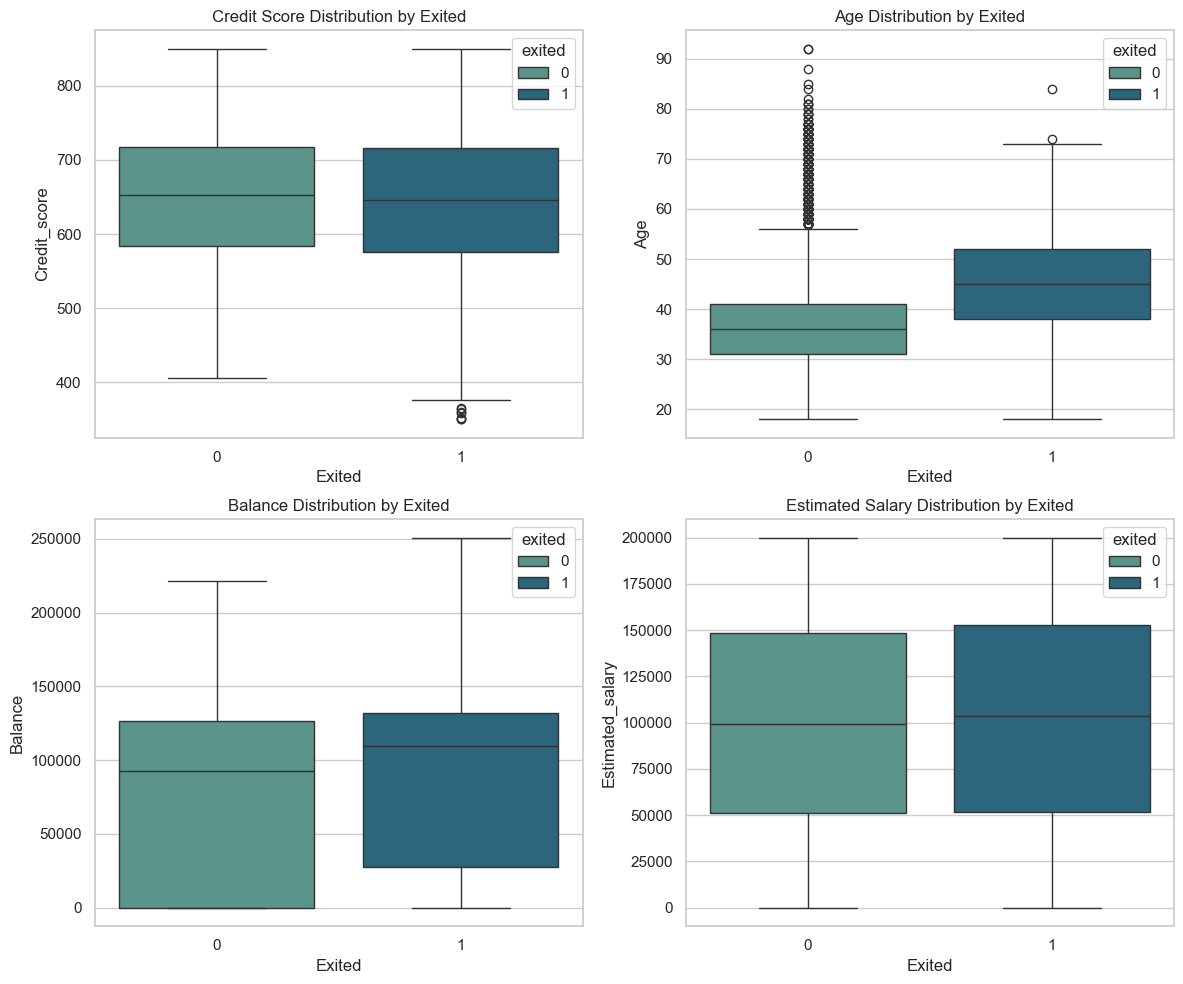

In [6472]:
plot_boxplots_with_target(customers_train, continuous_vars, target_col='exited', titles=titles)

# **Key Insights from Boxplots of Continuous Variables vs Target variabe**

## 1. **Age vs. Exited**
- Customers who have exited (`Exited = 1`) tend to be older than those who stayed (`Exited = 0`).
- **Insight**: Age is a giving us some major difference in churn prediction.

---

## 2. **Balance vs. Exited**
- Customers who exited have higher median balances compared to those who stayed.
- **Insight**: High-value customers with significant account balances are leaving, which was very suprising to me. Efforsts should be made to keep this group

---

In [6474]:
def plot_categorical_boxplots_with_target(df, categorical_vars, continuous_vars, target_col, titles, figsize=(15, 15)):
  
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = len(categorical_vars)  # One plot per categorical variable
    
    # Loop through the categorical variables and their corresponding continuous variables
    for i, (cat_var, cont_var, title) in enumerate(zip(categorical_vars, continuous_vars, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x=cat_var, y=cont_var, hue=target_col, palette="mako")
        plt.title(title)
        plt.xlabel(cat_var.capitalize())
        plt.ylabel(cont_var.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()


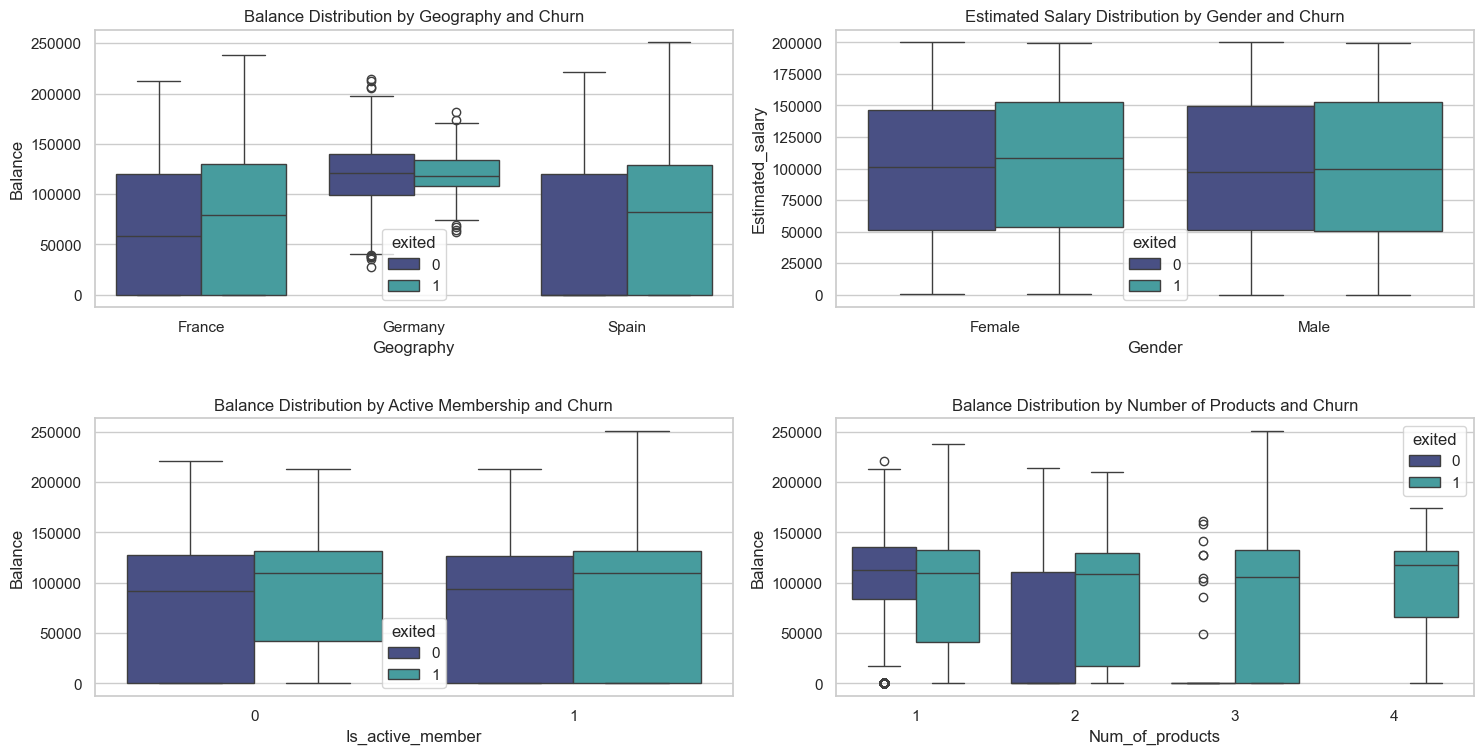

In [6477]:
# Variables to analyze
categorical_vars = ['geography', 'gender', 'is_active_member', 'num_of_products']
continuous_vars = ['balance', 'estimated_salary', 'balance', 'balance']
titles = [
    'Balance Distribution by Geography and Churn',
    'Estimated Salary Distribution by Gender and Churn',
    'Balance Distribution by Active Membership and Churn',
    'Balance Distribution by Number of Products and Churn'
]

# Call the function
plot_categorical_boxplots_with_target(customers_train, categorical_vars, continuous_vars, target_col='exited', titles=titles)

### **Balance Distribution by Geography and Churn**

- **Insight**: customers from **Germany** with **higher balances** are more likely to churn compared to those from **France** and **Spain**. France shows uniform balance distribution across churned and non-churned customers, while Spain has similar patterns for both categories.
- **Usefulness**: Some other factors are included as this indiacte regional difference

### **Balance Distribution by Num_of_products and Churn**
- **Insight**: Customers with 3 or more products have a higher likelihood of churning, especially with lower balances.


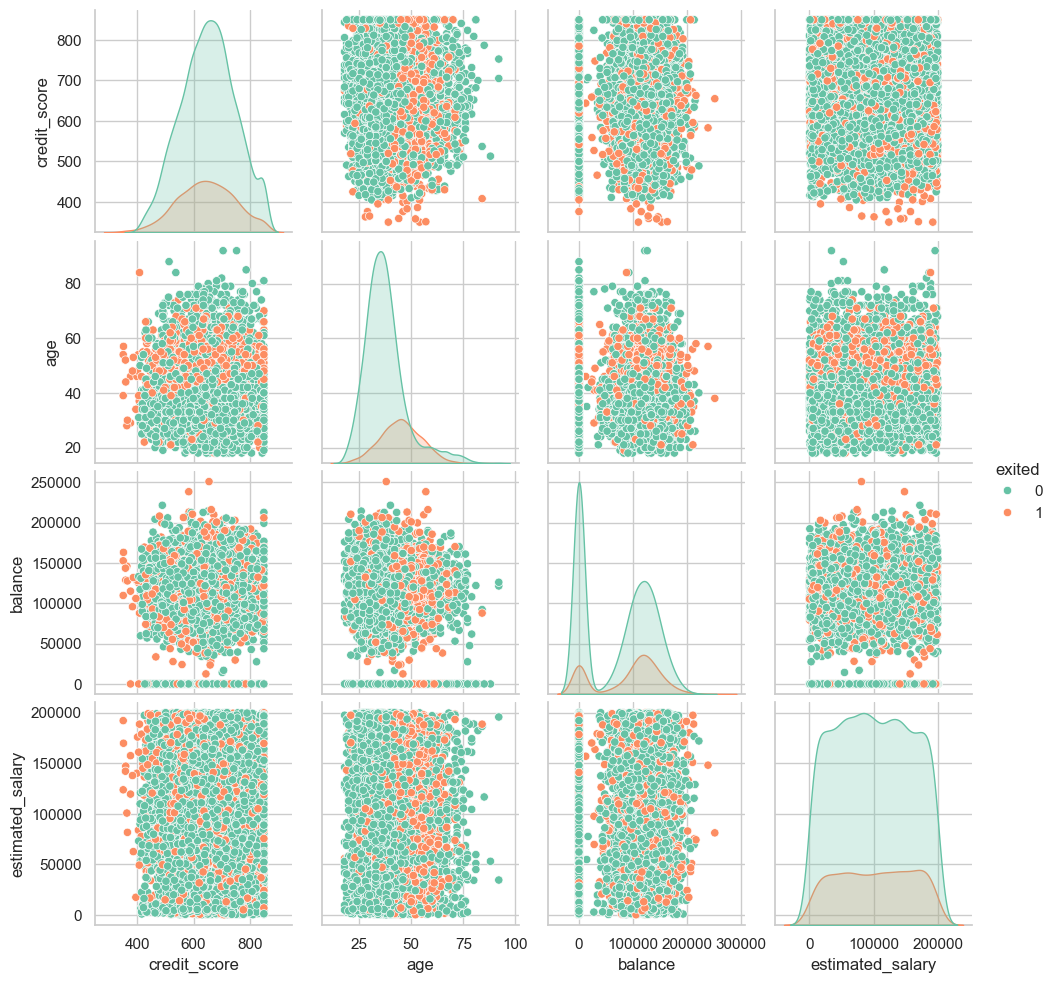

In [6480]:
columns = ['credit_score', 'age', 'balance', 'estimated_salary', 'exited']
sns.pairplot(customers_train[columns], hue='exited', palette='Set2')
plt.show()

By looking at the scatter lots of different continuous variables, we dont see any visible pattern
to clearly separate our target variable

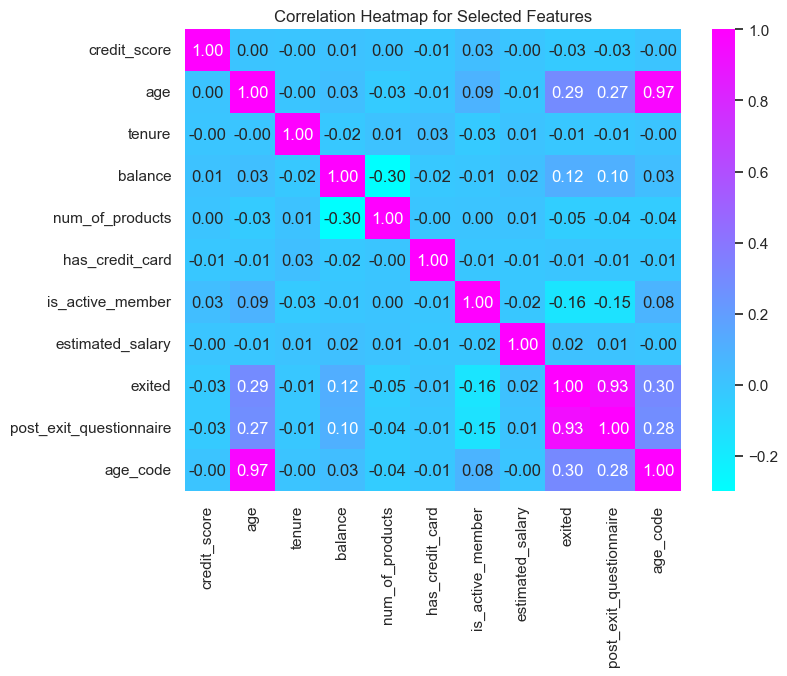

In [6482]:
selected_columns = ['credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited', 'post_exit_questionnaire','age_code']
subset_data = customers_train[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="cool", cbar=True)
plt.title("Correlation Heatmap for Selected Features")
plt.show()

By looking at the heatmap above we notice that there is a negative correlation of `isActiveMember` with the exit variable. Besides this Age and balance also looks promising columns. The rest of the columns have very low correlation but maybe could help together in better classification. Also, we need to remove post exit questionnaire column as despite high correlation with target variable as it was taken after the customer exit status

# **5. Feature Engineering**

First we will drop post_questionnaire column bcz of its high collinearity with the target variable and that is expected to be high as we saw before

In [6488]:
# Dropping Questionnaire column
customers_train.drop(columns = "post_exit_questionnaire", inplace = True)
customers_test.drop(columns = "post_exit_questionnaire", inplace = True)

Now, as most of the customers have **0 balance** and are using **less than 3 products**, we are creating two new features here. Will see later their effect

In [6491]:
def create_zero_balance_feature(df):
    df["zero_balance"] = (df["balance"] == 0).astype(int)
    return df

def products_greater_than_zero_feature(df):
    df["products_greater_than_two"] = (df["num_of_products"] > 2).astype(int)
    return df

customers_train = create_zero_balance_feature(customers_train)
customers_test = create_zero_balance_feature(customers_test)

customers_train = products_greater_than_zero_feature(customers_train)
customers_test = products_greater_than_zero_feature(customers_test)

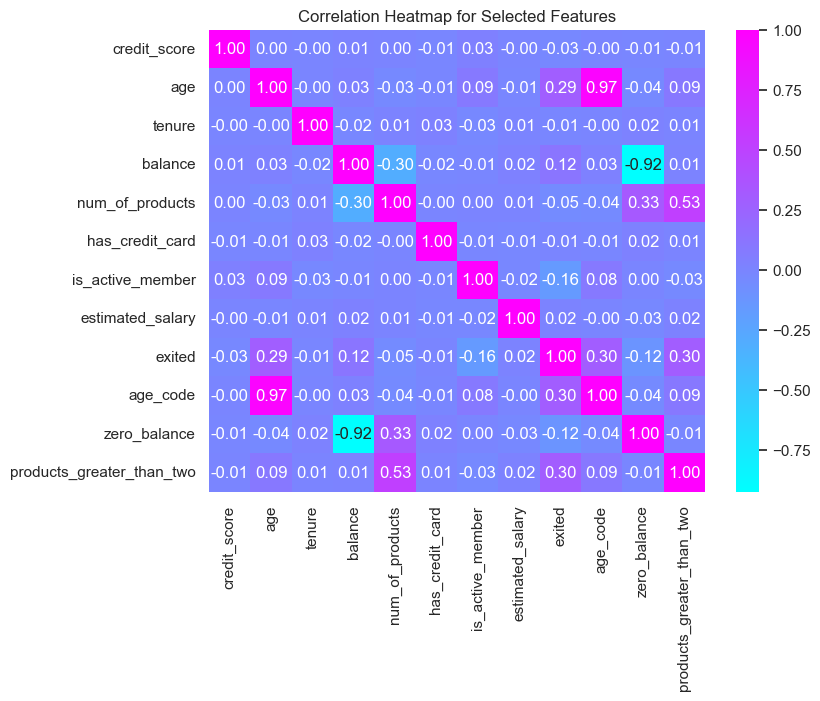

In [6493]:
selected_columns = ['credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited','age_code', 'zero_balance', 'products_greater_than_two']
subset_data = customers_train[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="cool", cbar=True)
plt.title("Correlation Heatmap for Selected Features")
plt.show()

# **Before Transformation**

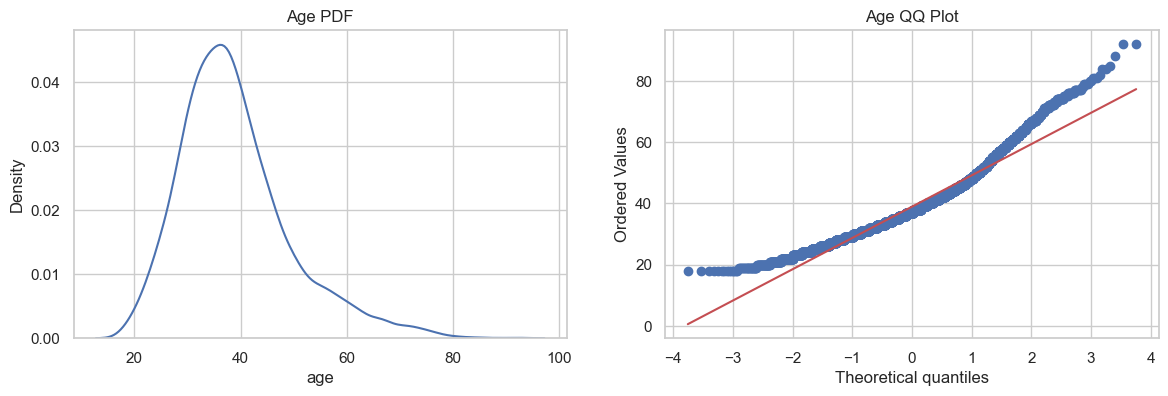

In [6496]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(customers_train['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

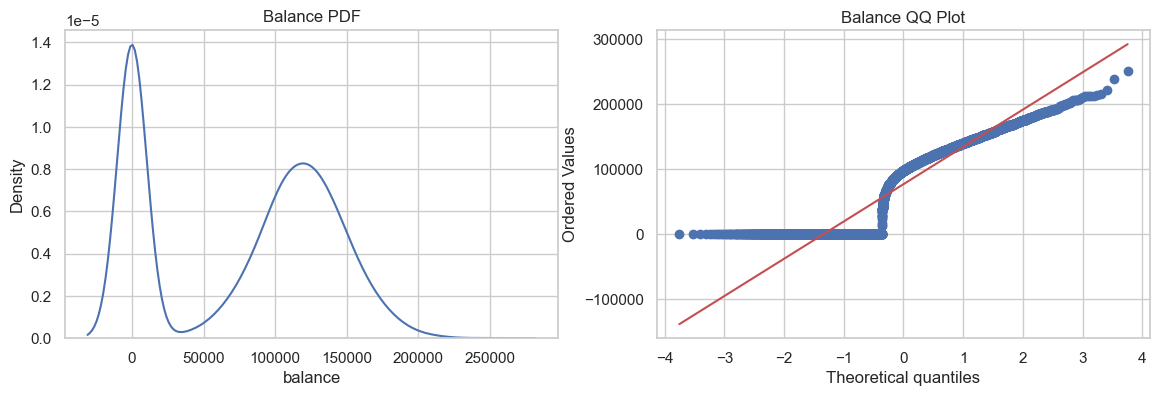

In [6497]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['balance'])
plt.title('Balance PDF')

plt.subplot(122)
stats.probplot(customers_train['balance'], dist="norm", plot=plt)
plt.title('Balance QQ Plot')

plt.show()

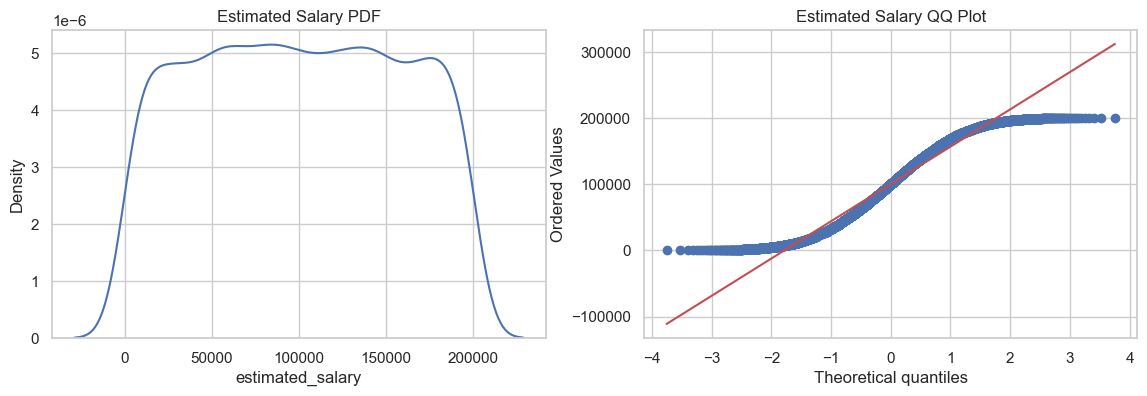

In [6499]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['estimated_salary'])
plt.title('Estimated Salary PDF')

plt.subplot(122)
stats.probplot(customers_train['estimated_salary'], dist="norm", plot=plt)
plt.title('Estimated Salary QQ Plot')

plt.show()

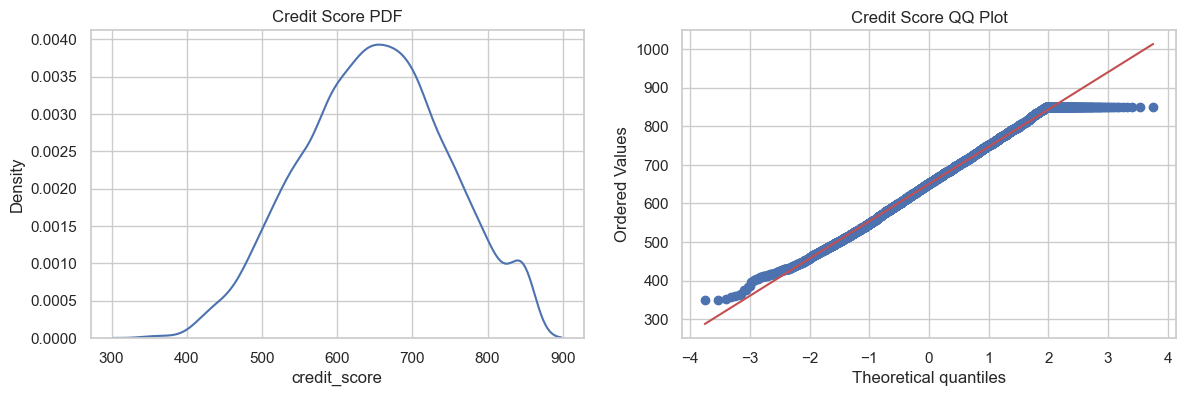

In [6500]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['credit_score'])
plt.title('Credit Score PDF')

plt.subplot(122)
stats.probplot(customers_train['credit_score'], dist="norm", plot=plt)
plt.title('Credit Score QQ Plot')

plt.show()


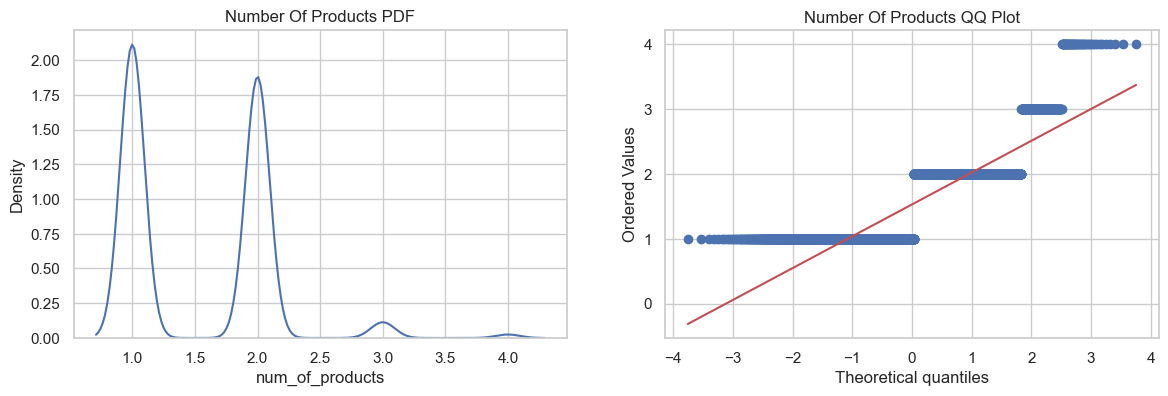

In [6502]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['num_of_products'])
plt.title('Number Of Products PDF')

plt.subplot(122)
stats.probplot(customers_train['num_of_products'], dist="norm", plot=plt)
plt.title('Number Of Products QQ Plot')

plt.show()


In [6503]:
# Initialize transformers
pt_boxcox = PowerTransformer(method='box-cox', standardize=True)  # For Box-Cox
pt_yeojohnson = PowerTransformer(method='yeo-johnson')  # For Yeo-Johnson
pt_yeojohnson2 = PowerTransformer(method='yeo-johnson', standardize=True)  # For Yeo-Johnson
scaler = StandardScaler()  # For standardization

# Fit transformers on X_train
customers_train['credit_score'] = pt_boxcox.fit_transform(customers_train[['credit_score']])
customers_test['credit_score'] = pt_boxcox.transform(customers_test[['credit_score']])

customers_train['age'] = pt_yeojohnson.fit_transform(customers_train[['age']])
customers_test['age'] = pt_yeojohnson.transform(customers_test[['age']])

customers_train['balance'] = pt_yeojohnson.fit_transform(customers_train[['balance']])  
customers_test['balance'] = pt_yeojohnson.transform(customers_test[['balance']]) 

customers_train['num_of_products'] = pt_yeojohnson.fit_transform(customers_train[['num_of_products']])  
customers_test['num_of_products'] = pt_yeojohnson.transform(customers_test[['num_of_products']]) 

customers_train['estimated_salary'] = pt_boxcox.fit_transform(customers_train[['estimated_salary']])
customers_test['estimated_salary'] = pt_boxcox.transform(customers_test[['estimated_salary']])






# **After Transformation**

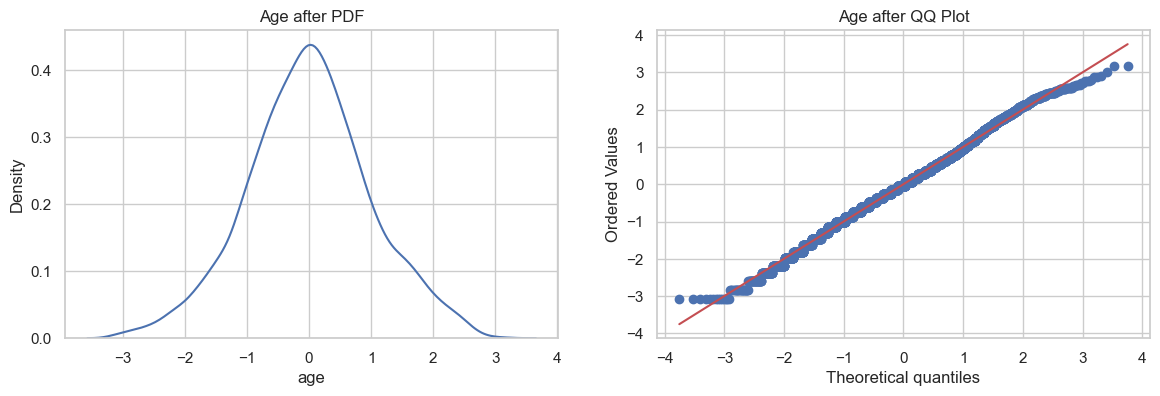

In [6509]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['age'])
plt.title('Age after PDF')

plt.subplot(122)
stats.probplot(customers_train['age'], dist="norm", plot=plt)
plt.title('Age after QQ Plot')

plt.show()

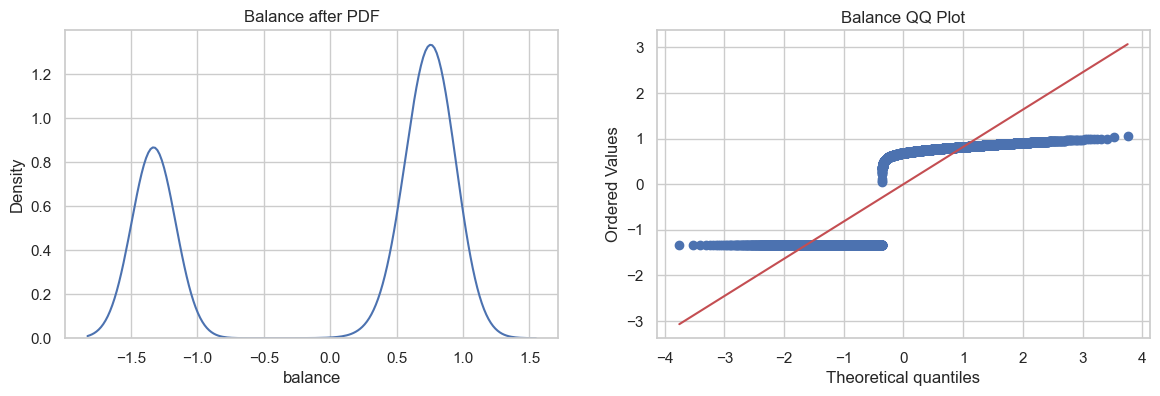

In [6510]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['balance'])
plt.title('Balance after PDF')

plt.subplot(122)
stats.probplot(customers_train['balance'], dist="norm", plot=plt)
plt.title('Balance QQ Plot')

plt.show()

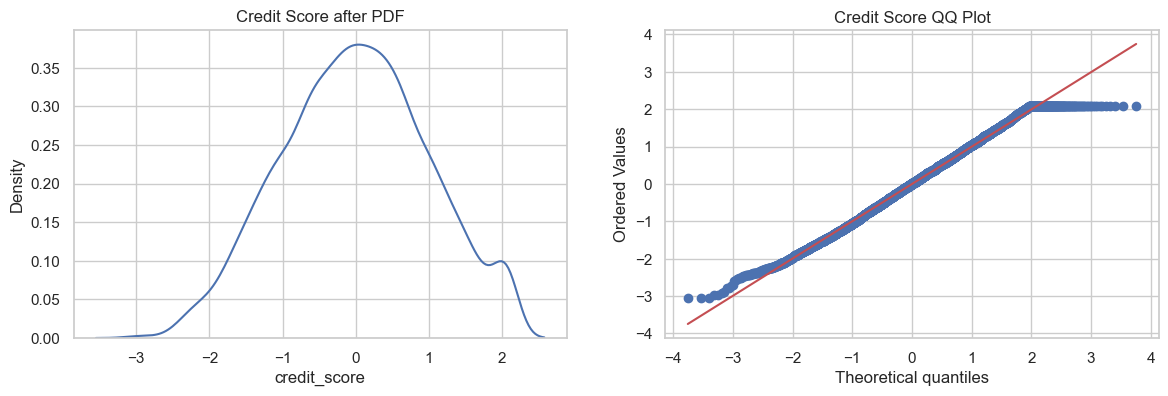

In [6512]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['credit_score'])
plt.title('Credit Score after PDF')

plt.subplot(122)
stats.probplot(customers_train['credit_score'], dist="norm", plot=plt)
plt.title('Credit Score QQ Plot')

plt.show()

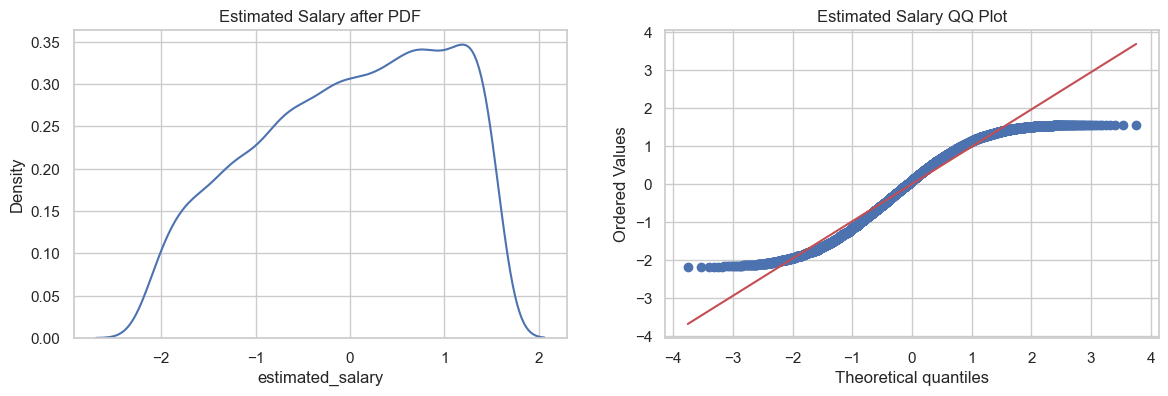

In [6514]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['estimated_salary'])
plt.title('Estimated Salary after PDF')

plt.subplot(122)
stats.probplot(customers_train['estimated_salary'], dist="norm", plot=plt)
plt.title('Estimated Salary QQ Plot')

plt.show()

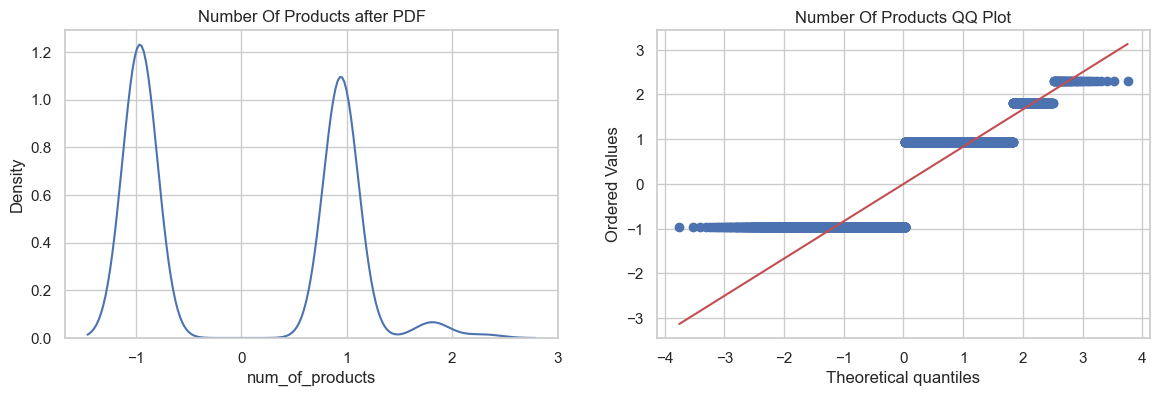

In [6517]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(customers_train['num_of_products'])
plt.title('Number Of Products after PDF')

plt.subplot(122)
stats.probplot(customers_train['num_of_products'], dist="norm", plot=plt)
plt.title('Number Of Products QQ Plot')

plt.show()

# **Label Encoder + One-Hot-Encode `Gender` and `Geography` column**

In [6520]:
label_encoder = LabelEncoder()

customers_train['gender'] = label_encoder.fit_transform(customers_train['gender'])
customers_test['gender'] = label_encoder.transform(customers_test['gender'])

ohe_train = pd.get_dummies(customers_train['geography'], prefix='geography', drop_first=True, dtype=int)
ohe_test = pd.get_dummies(customers_test['geography'], prefix='geography', drop_first=True, dtype=int)

customers_train = pd.concat([customers_train.drop('geography', axis=1), ohe_train], axis=1)
customers_test = pd.concat([customers_test.drop('geography', axis=1), ohe_test], axis=1)


## Rearranging Target Column to the end

In [6523]:
exited_col_train = customers_train.pop('exited')  # Remove the 'Exited' column
exited_col_test = customers_test.pop('exited')  # Remove the 'Exited' column

customers_train['exited'] = exited_col_train   
customers_test['exited'] = exited_col_test   

In [6525]:
customers_train.head(5)

,credit_score,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,age_code,age_group,zero_balance,products_greater_than_two,geography_Germany,geography_Spain,exited
0,-0.326639,0,0.449543,2,-1.328946,-0.962986,1,1,0.116359,2.0,"(39.228, 47.127]",1,0,0,0,1
1,-0.439893,0,0.358177,1,0.627565,-0.962986,0,1,0.295892,2.0,"(39.228, 47.127]",0,0,0,1,0
2,-1.524042,0,0.449543,8,0.867864,1.809675,1,0,0.317805,2.0,"(39.228, 47.127]",0,1,0,0,1
3,0.500846,0,0.166948,1,-1.328946,0.942637,0,0,-0.007485,1.0,"(31.442, 39.228]",1,0,0,0,0
4,2.079162,0,0.538273,2,0.775455,-0.962986,1,1,-0.258859,2.0,"(39.228, 47.127]",0,0,0,1,0


In [6527]:
customers_train.drop(columns = ["age_group"], inplace = True)
customers_test.drop(columns = ["age_group"], inplace = True)

# **ChiSquare to test categorical features importance**

2.1578862642962805e-24
4.64898461006756e-50
5.3206363437560105e-06
0.625492789613535
1.3832481732375718e-48
0.210076407738382
9.876975598726015e-267
5.134994632571161e-159


<Axes: title={'center': 'Chi-Square P-Values for Selected Features'}>

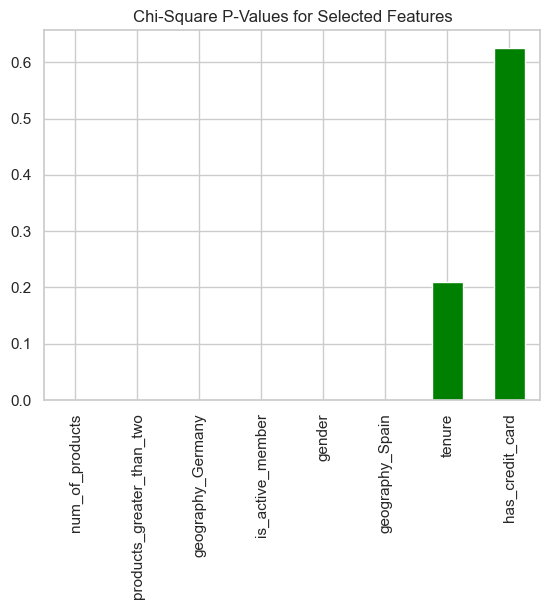

In [6530]:
def chi_square_test(data, target, features):

    score = []

    for feature in features:
        ct = pd.crosstab(data[target], data[feature])
        
        # Perform Chi-Square test and get p-value
        p_value = chi2_contingency(ct)[1]
        score.append(p_value)
        print(p_value)

    # Return p-values as a sorted series
    return pd.Series(score, index=features).sort_values(ascending=True)


selected_features = ['gender','geography_Germany','geography_Spain', 'has_credit_card','is_active_member','tenure','num_of_products','products_greater_than_two']  # Select specific features
p_values = chi_square_test(customers_train, target='exited', features=selected_features)

# Plot the results
p_values.plot(kind='bar', title='Chi-Square P-Values for Selected Features', color = "Green")


By implementing the above the chi square test, we see that if we want to not include any features, `has_credit_card` and `tenure` are the top 2 to not include as they have higher p-values

# **Variation Inflation Score**

In [6534]:
def calculate_vif(dataframe):

    columns = dataframe.columns
    
    vif = []
    
    # Loop through each feature (column) to calculate the VIF
    for i in range(len(columns)):
        vif.append(variance_inflation_factor(dataframe[columns].values, i))
    
    # Create a DataFrame to store VIF results
    vif_df = pd.DataFrame({'VIF': vif}, index=columns).T  # VIF in a single row, columns as index
    
    return vif_df

In [6536]:
# Calculate variate infation score to check for multicollinearity
vif_df = calculate_vif(customers_train)
vif_df

,credit_score,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,age_code,zero_balance,products_greater_than_two,geography_Germany,geography_Spain,exited
VIF,1.00199,2.202015,7.560989,3.926047,31.644983,1.484893,3.299967,2.139597,1.001818,18.008256,46.814973,1.406867,1.878134,1.489071,1.725489


We see an huge increase over a value of 5 in VIF as we create a feature our of `balance` and `age`, so we will decide later afetr experimenting with our models, if creating these new features work or not

In [6539]:
customers_train.drop(columns = ["age_code", "zero_balance", "products_greater_than_two"], inplace = True)
customers_test.drop(columns = ["age_code", "zero_balance", "products_greater_than_two"], inplace = True)

In [6541]:
vif_df = calculate_vif(customers_train)
vif_df

,credit_score,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,exited
VIF,1.001986,1.949563,1.104971,2.879271,1.45105,1.201982,2.633594,1.834772,1.001705,1.782564,1.399611,1.41353


# **Standardization**

In [6544]:
# balance', 'zero_balance', 'age_group', 'age_code', 'age', 'products_greater_than_two'

X_train = customers_train.drop(['exited'], axis=1) # Features (excluding the target column)
y_train = customers_train['exited']  # Target (whether the person smokes)

X_test = customers_test.drop(['exited'], axis=1) # Features (excluding the target column)
y_test = customers_test['exited']  # Target (whether the person smokes)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Random Sampling**

As our data is highly imbalanced, as we saw in `EDA` before, we would require sampling of our minority class data points.
Here, I chose to use RandomOverSampler over `SMOTE` as our dataset contains many categorical variables and SMOTE does not work well with categorical data. Although `RandomOverSampler` generates many duplicate points as compared to the interpolation concept of SMOTE, the choice is debateable. For right now, we will stick with this.

In [6548]:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [6550]:
y_train.value_counts()

exited
1    6353
0    6353
Name: count, dtype: int64

# **6. ML Models Implementation and Evaluation**



In [6342]:
model_results_df = pd.DataFrame()

def add_classification_report_from_dict(report, model_name, results_df):

    data = {
        'Model': model_name,
        'Precision(0)': round(report['0']['precision'],2),
        'Recall(0)': round(report['0']['recall'],2),
        'F1-Score(0)': round(report['0']['f1-score'],2),
        'Support(0)': round(report['0']['support'],2),
        'Precision(1)': round(report['1']['precision'],2),
        'Recall(1)': round(report['1']['recall'],2),
        'F1-Score(1)': round(report['1']['f1-score'],2),
        'Support(1)': round(report['1']['support'],2),
        'Accuracy': round(report['accuracy'],2),
    }
    
    # Append the new data as a row to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([data])], ignore_index=True)
    
    return results_df

# Logistic Reression Classifier

LR Cross-validation scores: 0.7139925782290588
LR Accuracy score =  0.7015


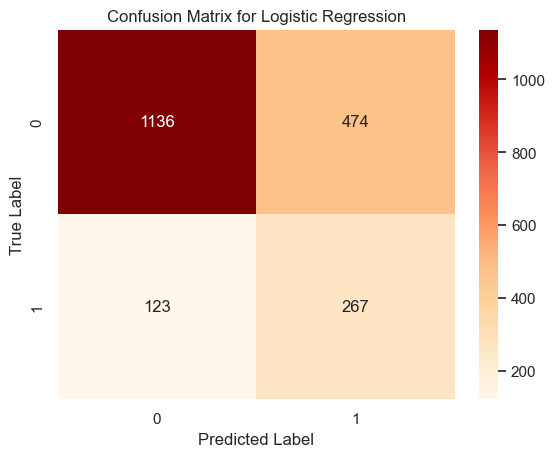


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1610
           1       0.36      0.68      0.47       390

    accuracy                           0.70      2000
   macro avg       0.63      0.70      0.63      2000
weighted avg       0.80      0.70      0.73      2000



In [6344]:
lr_clf = LogisticRegression(C= 1, random_state=42)  # You can adjust the random_state
lr_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='recall')
print("LR Cross-validation scores:", cv_scores.mean())

y_pred =lr_clf.predict(X_test)
print("LR Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6346]:
lr_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(lr_report, "Logistic Regression", model_results_df)

# SVC Classifier

SVC Cross-validation scores: 0.7975761167521414
SVC Accuracy score =  0.7765


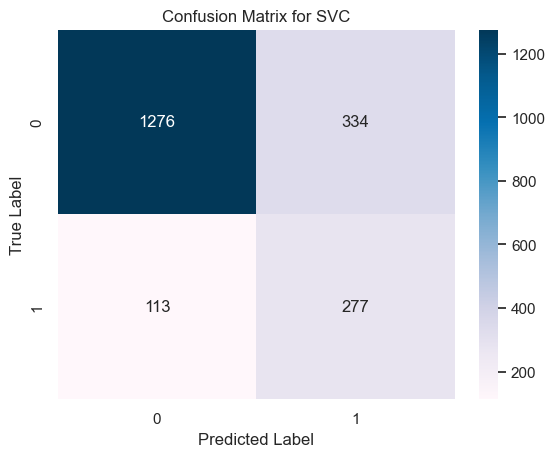


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1610
           1       0.45      0.71      0.55       390

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.83      0.78      0.79      2000



In [6349]:
svc_clf = SVC(C=0.8, gamma = 'auto')
svc_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(svc_clf, X_train, y_train, cv=5, scoring='accuracy')
print("SVC Cross-validation scores:", cv_scores.mean())

y_pred = svc_clf.predict(X_test)
print("SVC Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6350]:
svc_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(svc_report, "SVC", model_results_df)

# Decision Tree Classifier

DT Cross-validation scores: 0.7967104397402659
DT Accuracy score =  0.7805


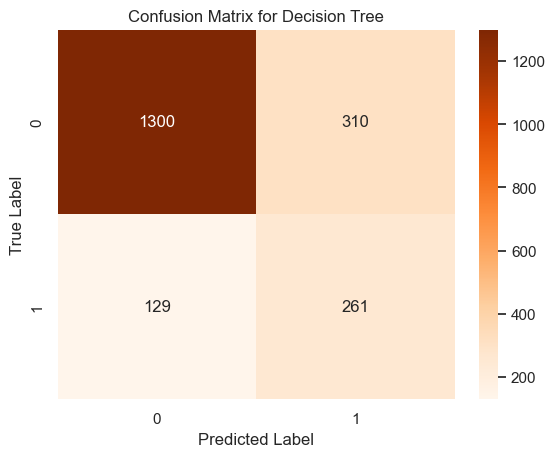


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1610
           1       0.46      0.67      0.54       390

    accuracy                           0.78      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.78      0.79      2000



In [6352]:
dt_clf = DecisionTreeClassifier(min_samples_split = 40, min_samples_leaf = 40, max_depth = 30,  criterion = 'gini')  # You can adjust the random_state
dt_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy')
print("DT Cross-validation scores:", cv_scores.mean())

y_pred = dt_clf.predict(X_test)
print("DT Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [6356]:
dt_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(dt_report, "Decision Tree", model_results_df)

# Random Forest Classifier

In [4264]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [2, 5, 7,  10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [ 2, 5, 7, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 7, 10, 15, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 5, 7, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   scoring='accuracy')

In [4267]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
0.9211395737752935


In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7,  10, 15, 20, 30],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

RF Cross-validation scores: 0.807807937240739
RF Accuracy score =  0.808


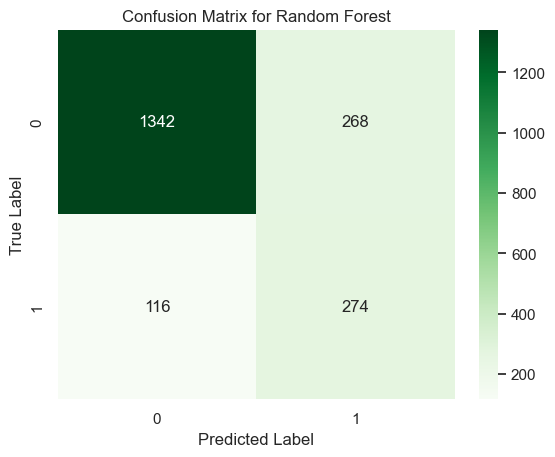


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1610
           1       0.51      0.70      0.59       390

    accuracy                           0.81      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000



In [6358]:
rf_clf = RandomForestClassifier(n_estimators = 300, min_samples_split = 40, min_samples_leaf = 40, max_depth = 30,  criterion = 'entropy')  # You can adjust the random_state
rf_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
print("RF Cross-validation scores:", cv_scores.mean())

y_pred = rf_clf.predict(X_test)
print("RF Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6359]:
rf_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(rf_report, "Random Forest", model_results_df)

# Ada Boost

AdaBoost Classifier Cross-validation scores: 0.7721546059171606
RF Accuracy score =  0.7875


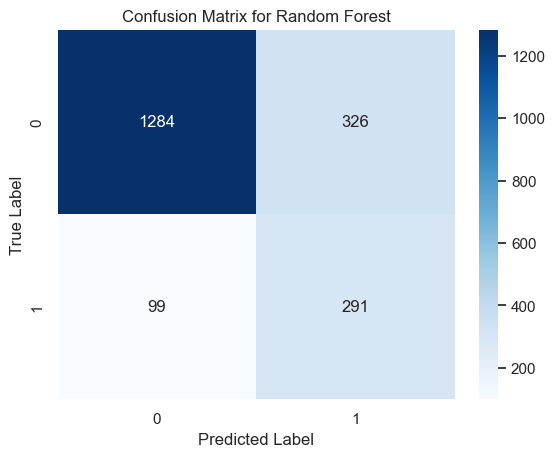


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1610
           1       0.47      0.75      0.58       390

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [6360]:
ad_clf = AdaBoostClassifier(n_estimators = 300, learning_rate= 0.8, random_state=42, algorithm = "SAMME")  # You can adjust the random_state
ad_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(ad_clf, X_train, y_train, cv=3, scoring='accuracy')
print("AdaBoost Classifier Cross-validation scores:", cv_scores.mean())

y_pred = ad_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
print("RF Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6361]:
ada_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(ada_report, "AdaBoost", model_results_df)

# Gradient Boosting

In [3571]:
parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [100, 150, 200, 300, 400],
              'max_depth': [5,10, 15, 20, 25,30],
              'min_samples_leaf':[5,10,15,20,25,30],
              'min_samples_split':[5,10,15,20,25,30]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1, scoring = 'recall')
gridGradient.fit(X_train, y_train)

print(gridGradient.best_params_)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 25, 'max_depth': 10, 'learning_rate': 0.3}


Gradient Boost Classifier Cross-validation scores: 0.7944277029520398
Gradient Boost Accuracy score =  0.803


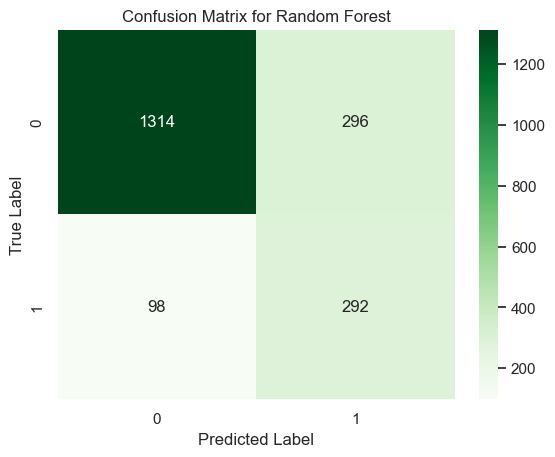


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1610
           1       0.50      0.75      0.60       390

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.85      0.80      0.82      2000



In [6362]:
grad_boost_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1,random_state = 42)
grad_boost_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(grad_boost_clf, X_train, y_train, cv=3, scoring='accuracy')
print("Gradient Boost Classifier Cross-validation scores:", cv_scores.mean())

y_pred = grad_boost_clf.predict(X_test)
print("Gradient Boost Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6363]:
gb_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(gb_report, "Gradient Boosting", model_results_df)

# XGB Classifier

In [3610]:
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 25, 30],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [100, 200, 300, 400, 500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print(gridGradient.best_params_)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 25, 'max_depth': 10, 'learning_rate': 0.3}


XGB Classifier Cross-validation scores: 0.8015902002252763
XGB Classifier Accuracy score =  0.8085


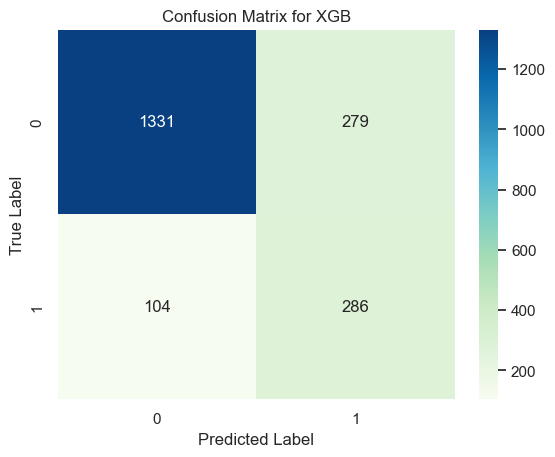


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      1610
           1       0.51      0.73      0.60       390

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.85      0.81      0.82      2000



In [6366]:
xgb_clf = XGBClassifier(subsample = 0.2, reg_lambda = 0.3, reg_alpha = 0.3, n_estimators = 400, min_child_weight = 3, max_depth = 5, learning_rate = 0.01, gamma = 0.9, colsample_bytree = 0.9, random_state = 0)
xgb_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring='accuracy')
print("XGB Classifier Cross-validation scores:", cv_scores.mean())

y_pred = xgb_clf.predict(X_test)
print("XGB Classifier Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for XGB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6367]:
xgb_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(xgb_report, "XGB", model_results_df)

# Voting Classifier

Voting Classifier Cross-validation scores: 0.7937983454723089
Voting Classifier Accuracy score =  0.802


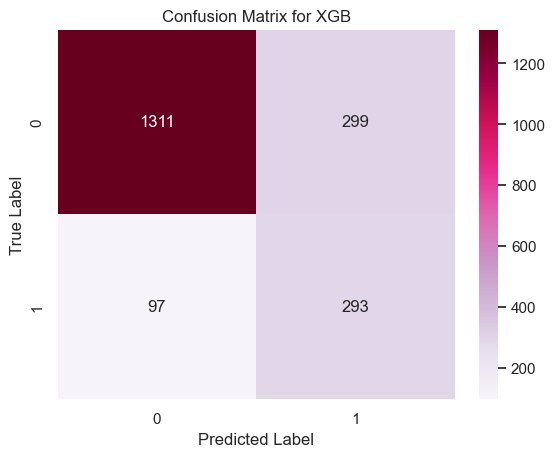


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1610
           1       0.49      0.75      0.60       390

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.85      0.80      0.82      2000



In [6378]:
voting_clf = VotingClassifier(estimators=[('ad',ad_clf),('gb', grad_boost_clf), ('xgb', xgb_clf)],voting='hard', n_jobs = -1)

voting_clf.fit(X_train, y_train) 

cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')
print("Voting Classifier Cross-validation scores:", cv_scores.mean())

y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy score = ", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Ensure class `1` (Exited) comes first

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', linewidths=0)  # Set linewidths=0
plt.title("Confusion Matrix for XGB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [6380]:
voting_report = classification_report(y_test, y_pred, output_dict=True)
model_results_df = add_classification_report_from_dict(voting_report, "Voting Classifier", model_results_df)

In [5558]:
model_results_df # all original features scaled

,Model,Precision(0),Recall(0),F1-Score(0),Support(0),Precision(1),Recall(1),F1-Score(1),Support(1),Accuracy
0,Logistic Regression,0.90,0.71,0.79,1610.0,0.36,0.68,0.47,390.0,0.70
1,SVC,0.92,0.79,0.85,1610.0,0.45,0.71,0.55,390.0,0.78
2,Decision Tree,0.91,0.81,0.85,1610.0,0.45,0.67,0.54,390.0,0.78
3,Random Forest,0.92,0.83,0.88,1610.0,0.51,0.71,0.59,390.0,0.81
4,AdaBoost,0.93,0.80,0.86,1610.0,0.47,0.75,0.58,390.0,0.79
5,Gradient Boosting,0.93,0.82,0.87,1610.0,0.50,0.75,0.60,390.0,0.80
6,XGB,0.93,0.83,0.87,1610.0,0.51,0.73,0.60,390.0,0.81
7,Voting Classifier,0.93,0.81,0.87,1610.0,0.49,0.75,0.60,390.0,0.80


In [5752]:
model_results_df # all original features scaled + removed has credit card and tenure

,Model,Precision(0),Recall(0),F1-Score(0),Support(0),Precision(1),Recall(1),F1-Score(1),Support(1),Accuracy
0,Logistic Regression,0.90,0.71,0.79,1610.0,0.36,0.69,0.47,390.0,0.70
1,SVC,0.92,0.80,0.85,1610.0,0.46,0.72,0.56,390.0,0.78
2,Decision Tree,0.91,0.80,0.85,1610.0,0.45,0.68,0.54,390.0,0.78
3,Random Forest,0.92,0.84,0.88,1610.0,0.52,0.71,0.60,390.0,0.81
4,AdaBoost,0.92,0.84,0.88,1610.0,0.52,0.71,0.60,390.0,0.81
5,Gradient Boosting,0.93,0.82,0.87,1610.0,0.50,0.74,0.60,390.0,0.81
6,XGB,0.93,0.82,0.87,1610.0,0.50,0.74,0.60,390.0,0.81
7,Voting Classifier,0.93,0.82,0.87,1610.0,0.50,0.74,0.60,390.0,0.81


In [6184]:
model_results_df # transformed features + age and balance removed kept num_of_products though

,Model,Precision(0),Recall(0),F1-Score(0),Support(0),Precision(1),Recall(1),F1-Score(1),Support(1),Accuracy
0,Logistic Regression,0.92,0.78,0.84,1610.0,0.44,0.73,0.55,390.0,0.77
1,SVC,0.92,0.80,0.86,1610.0,0.47,0.72,0.57,390.0,0.78
2,Decision Tree,0.92,0.79,0.85,1610.0,0.44,0.70,0.54,390.0,0.77
3,Random Forest,0.92,0.81,0.86,1610.0,0.48,0.70,0.57,390.0,0.79
4,AdaBoost,0.92,0.81,0.86,1610.0,0.48,0.71,0.57,390.0,0.79
5,Gradient Boosting,0.92,0.81,0.86,1610.0,0.48,0.72,0.58,390.0,0.79
6,XGB,0.92,0.81,0.86,1610.0,0.47,0.71,0.57,390.0,0.79
7,Voting Classifier,0.92,0.81,0.86,1610.0,0.47,0.72,0.57,390.0,0.79


In [5943]:
model_results_df # all transformed features + removed age, balance, number_of_products

,Model,Precision(0),Recall(0),F1-Score(0),Support(0),Precision(1),Recall(1),F1-Score(1),Support(1),Accuracy
0,SVC,0.90,0.80,0.85,1610.0,0.44,0.65,0.52,390.0,0.77
1,Decision Tree,0.90,0.75,0.82,1610.0,0.39,0.64,0.48,390.0,0.73
2,Random Forest,0.91,0.79,0.85,1610.0,0.45,0.69,0.54,390.0,0.77
3,AdaBoost,0.92,0.75,0.83,1610.0,0.41,0.72,0.53,390.0,0.74
4,Gradient Boosting,0.91,0.80,0.85,1610.0,0.45,0.69,0.55,390.0,0.78
5,XGB,0.91,0.80,0.85,1610.0,0.45,0.67,0.54,390.0,0.78
6,Voting Classifier,0.91,0.80,0.85,1610.0,0.45,0.69,0.55,390.0,0.78


In [5989]:
model_results_df # all transformed features + removed age, balance, number_of_products + removed has credit card and tenure

,Model,Precision(0),Recall(0),F1-Score(0),Support(0),Precision(1),Recall(1),F1-Score(1),Support(1),Accuracy
0,Logistic Regression,0.90,0.73,0.80,1610.0,0.37,0.66,0.47,390.0,0.71
1,SVC,0.91,0.81,0.86,1610.0,0.46,0.66,0.54,390.0,0.78
2,Decision Tree,0.90,0.75,0.82,1610.0,0.39,0.65,0.49,390.0,0.73
3,Random Forest,0.91,0.80,0.85,1610.0,0.45,0.67,0.54,390.0,0.77
4,AdaBoost,0.92,0.75,0.83,1610.0,0.41,0.72,0.53,390.0,0.74
5,Gradient Boosting,0.91,0.79,0.85,1610.0,0.44,0.68,0.54,390.0,0.77
6,XGB,0.91,0.79,0.85,1610.0,0.45,0.68,0.54,390.0,0.77
7,Voting Classifier,0.91,0.79,0.85,1610.0,0.44,0.69,0.54,390.0,0.77


# Model Evaluation Conclusion

After running various linear + ensemble models, I noticed that the `accuracy` I was getting was around `81%`. I did achieve higher accuracy than this upto 84-85% but as we are more focused on determining `Churn` customers, we needed to look at other parameters, i.e `Recall`, `Precision` and `F1-score` , especially the `recall` parameter for our `Exited` customers. So, in order to increase that param, I had to compromise on Accuracy param a bit.

Also, as this dataset was `highly imbalanced`, we needed to oversample our data  and we went with the `RandomOverSampler` approach over SMOTE for our dataset. Implementing SMOTE would have resulted in a bit of low accuracy because of its nature of generating synthetic points, but one can experiment with that too.

Moreover, I noticed that in terms of `Accuracy` and `Recall` for our `Exited` customers, we were getting best results with `Original Features scaled` and we also got around same results after removing categorical columns like `tenure` and `has_credit_card` after testing with `Chi-square` method.

Finally, `Ensemble methods` were giving me better results, especially with `Gradient Boosting`, `XGB` and `AdaBoost` performing well in all aspects without overfitting our model with an `Accuracy of 81%`, `Recall of 75%` with `F1-score` balanced around `60%` .